In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train_data_path = "../data/train/"
test_data_path = "../data/test/"

train_data_files = ["AAPL", "BRK_B", "DVN","NVDA", "PCG", "ROST", "V", "VNQ"]
test_data_files = ["LOW", "TSLA"]

vis_path = "../visualizations/"

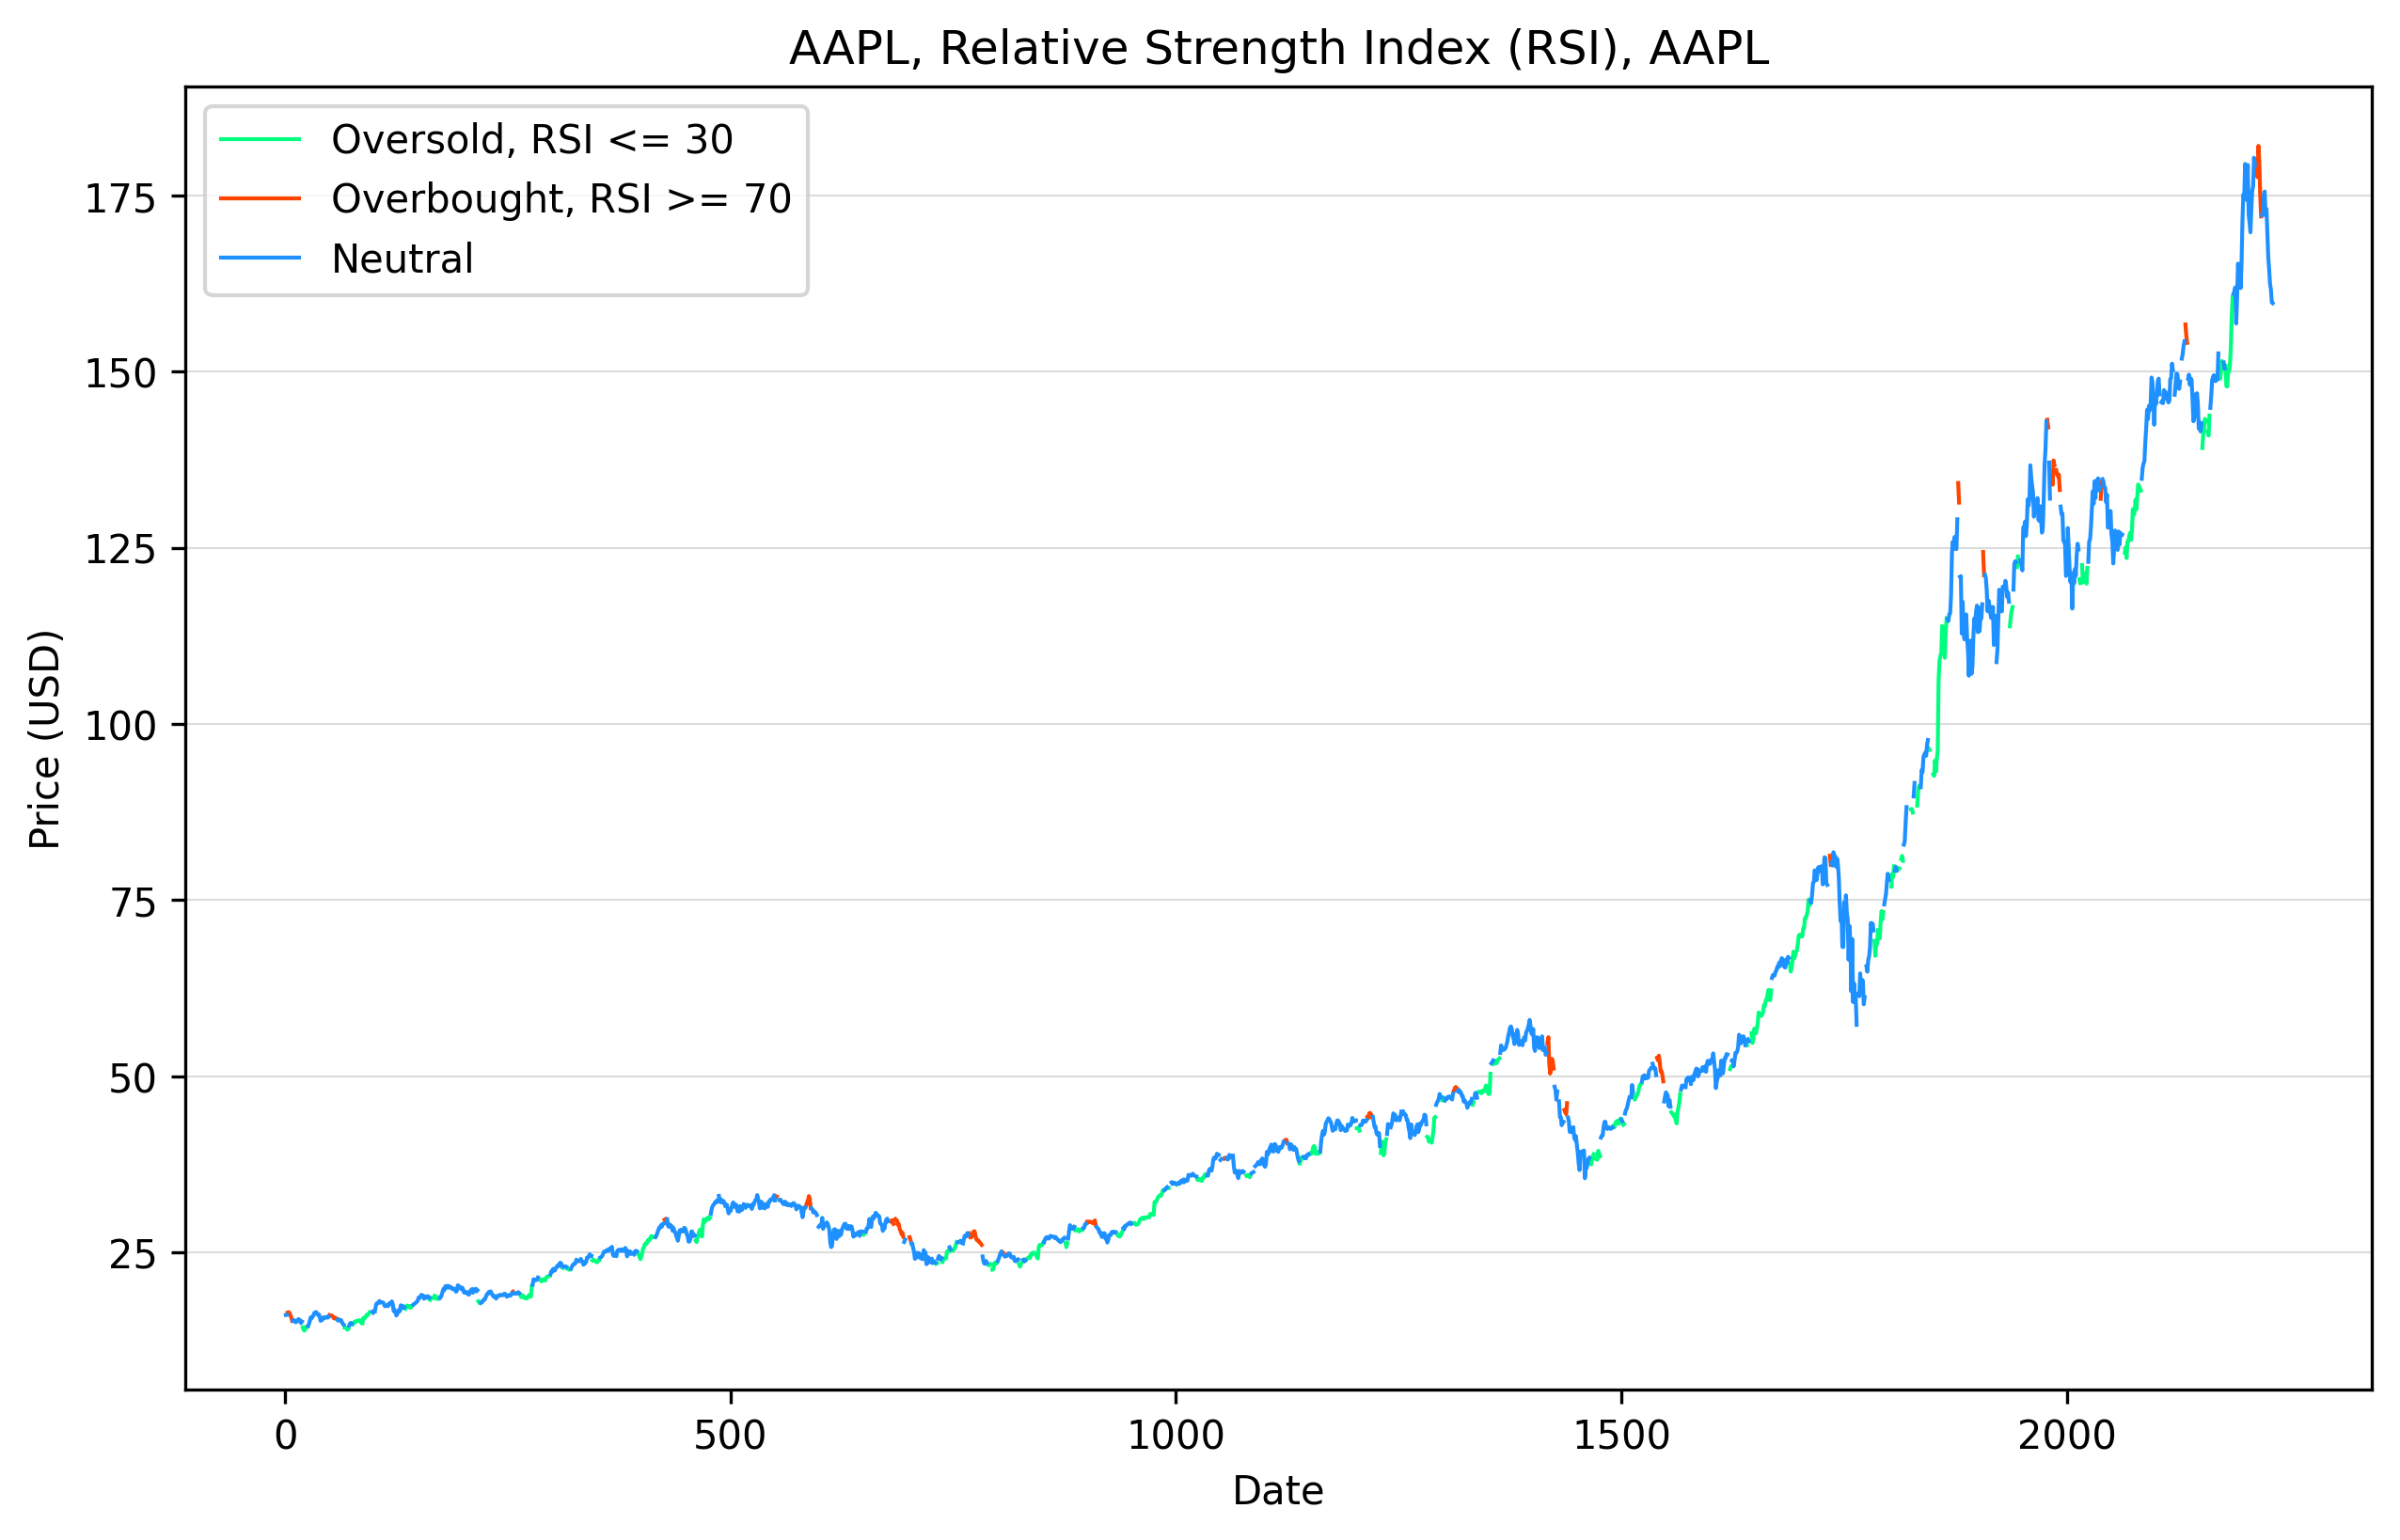

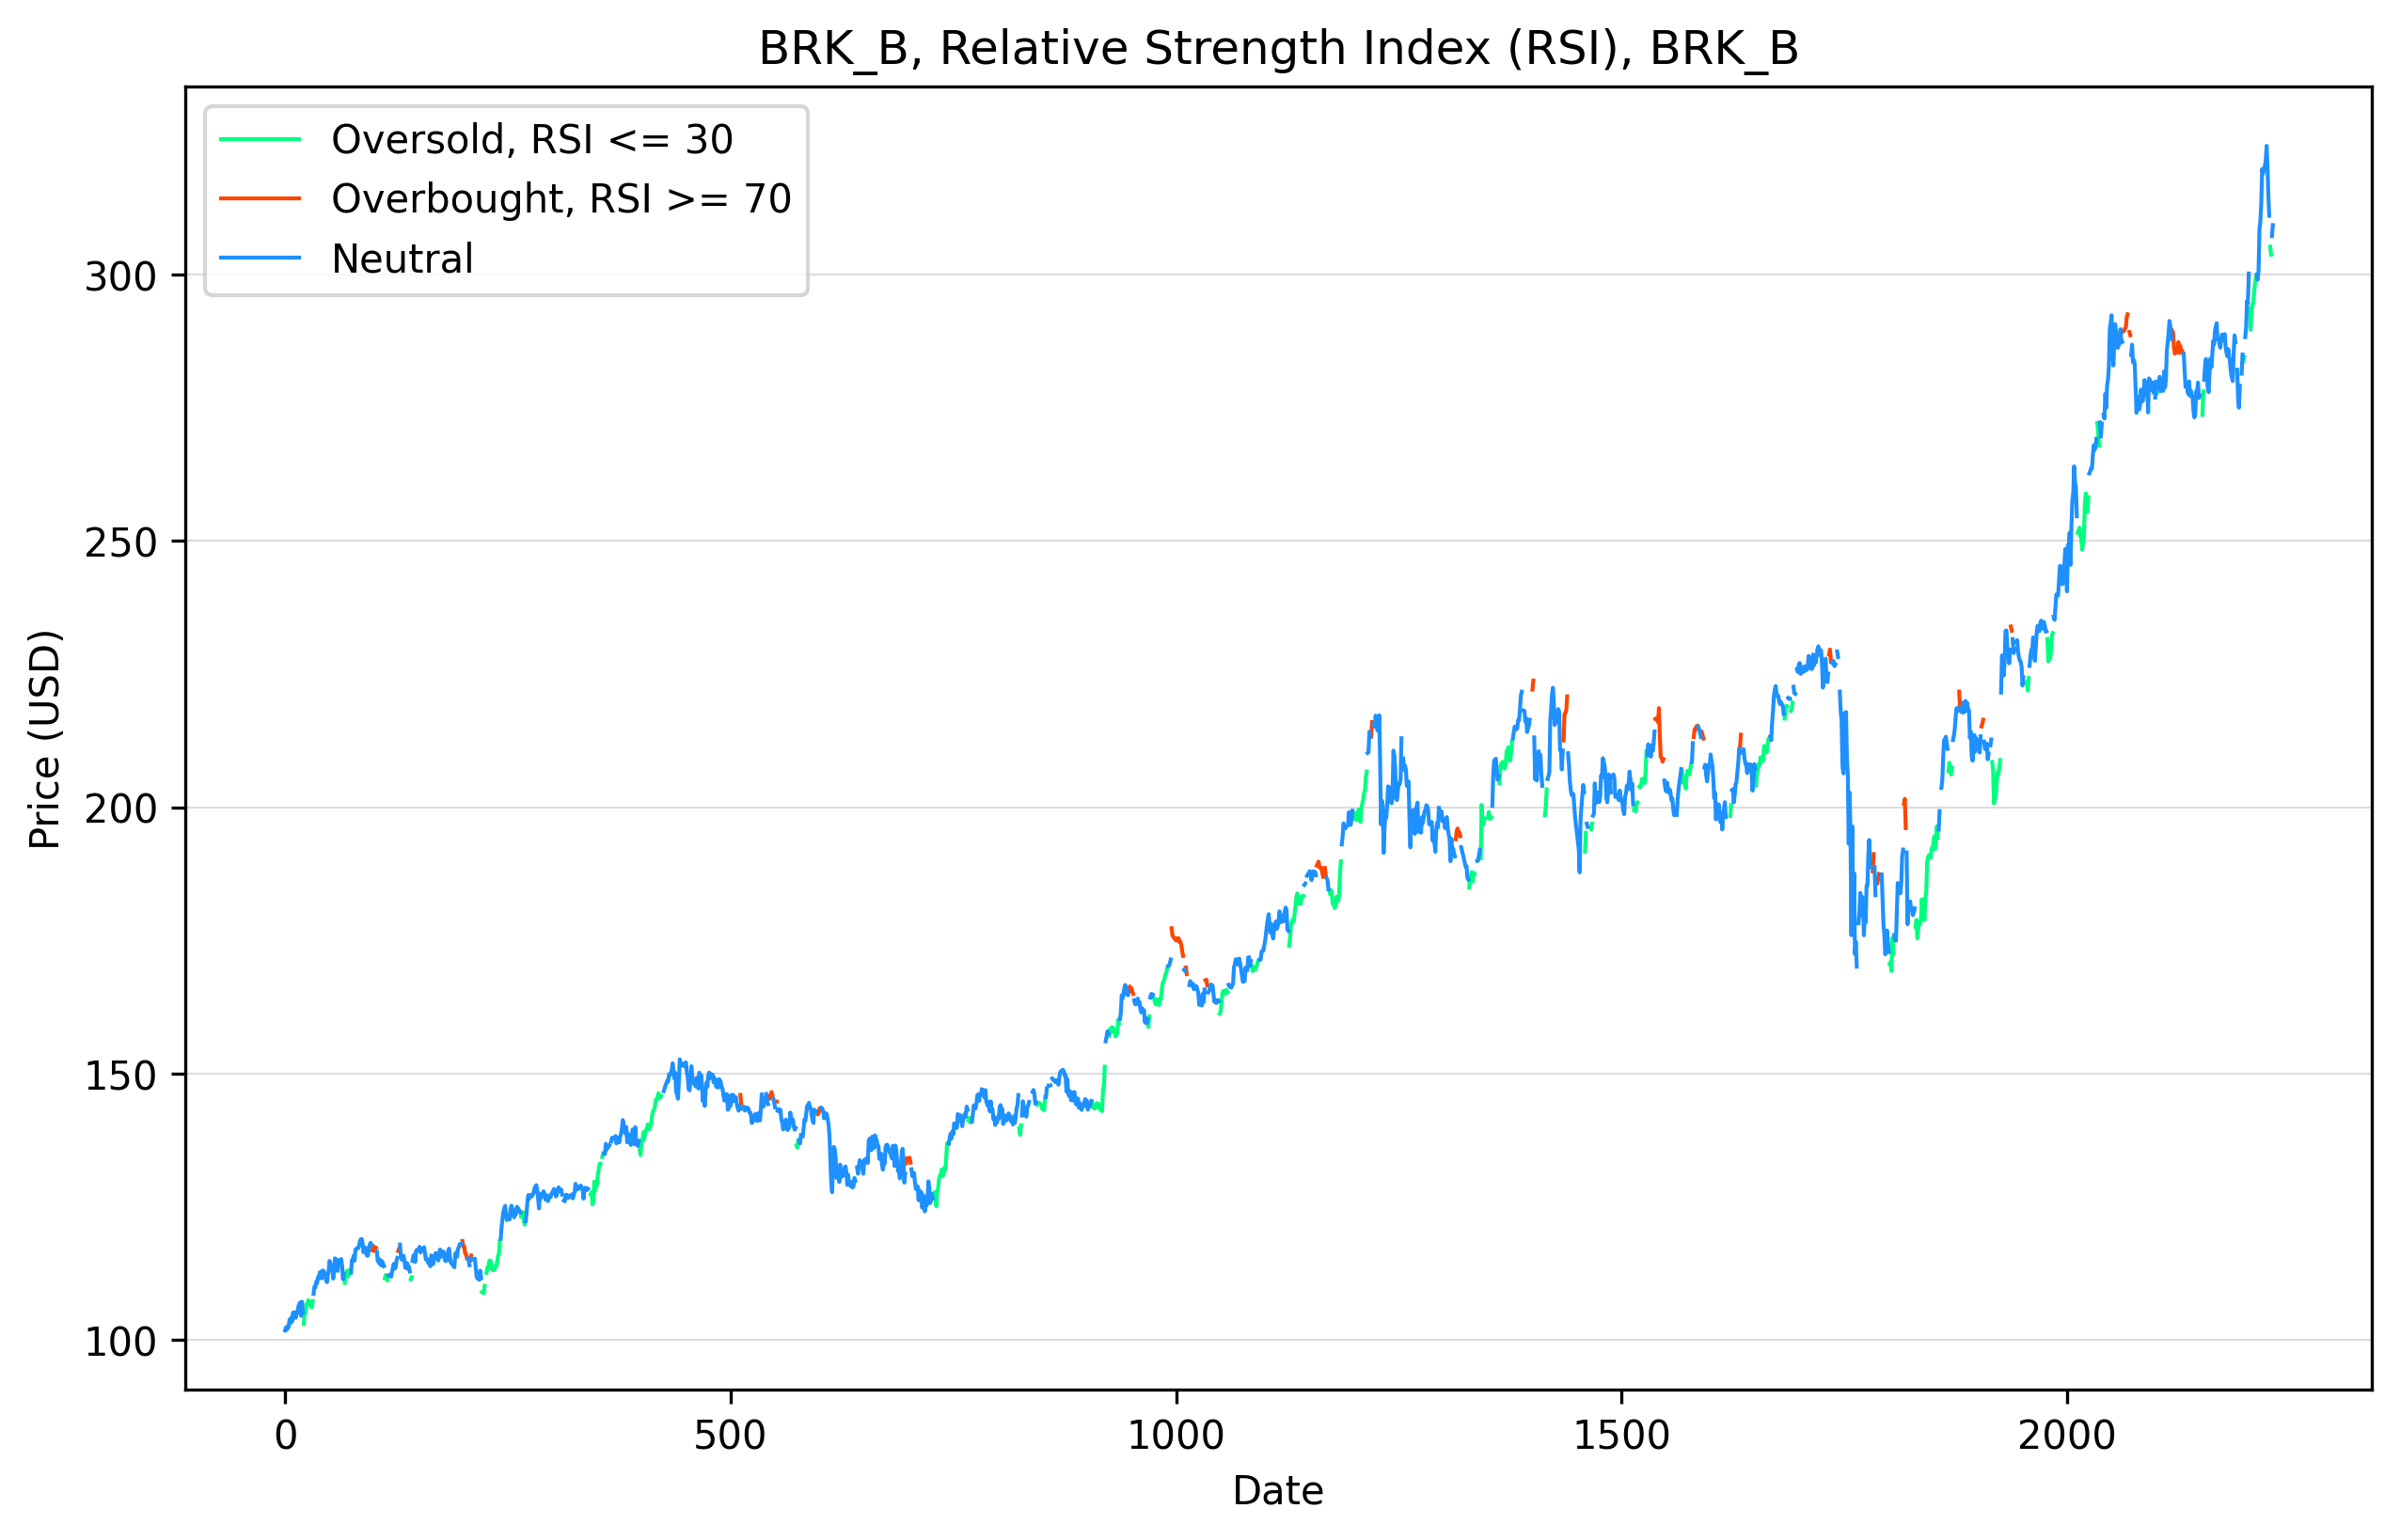

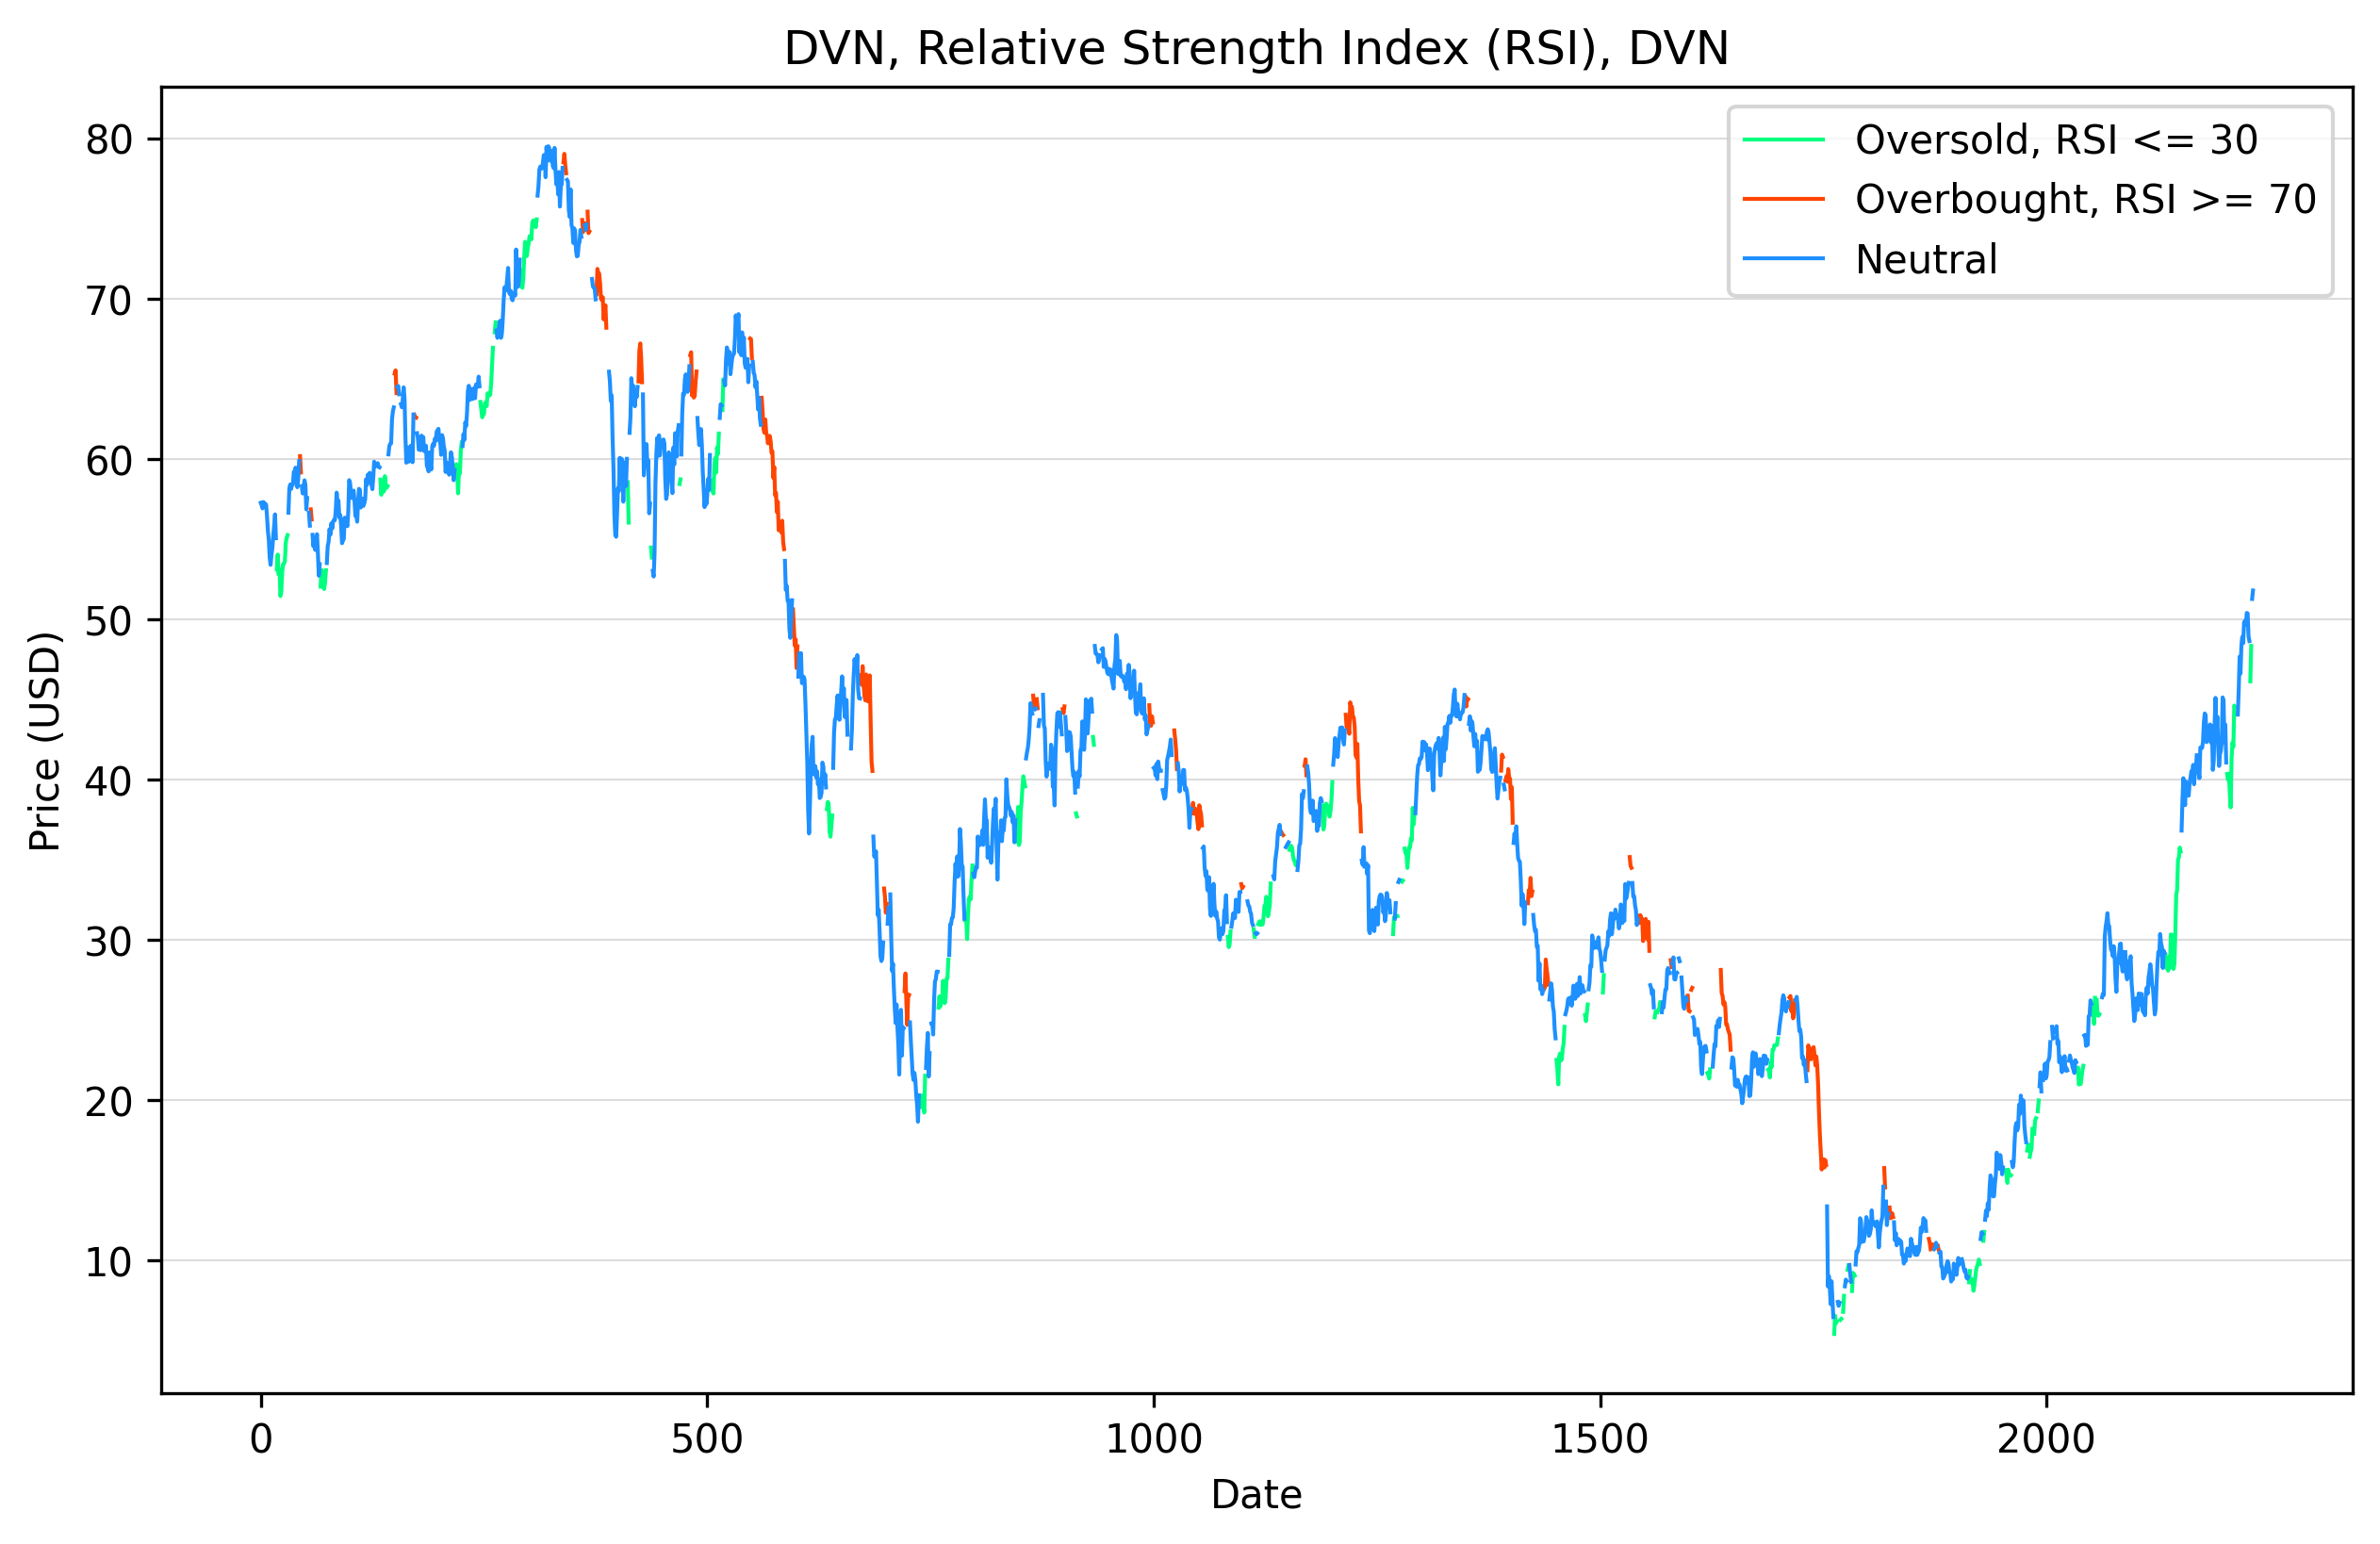

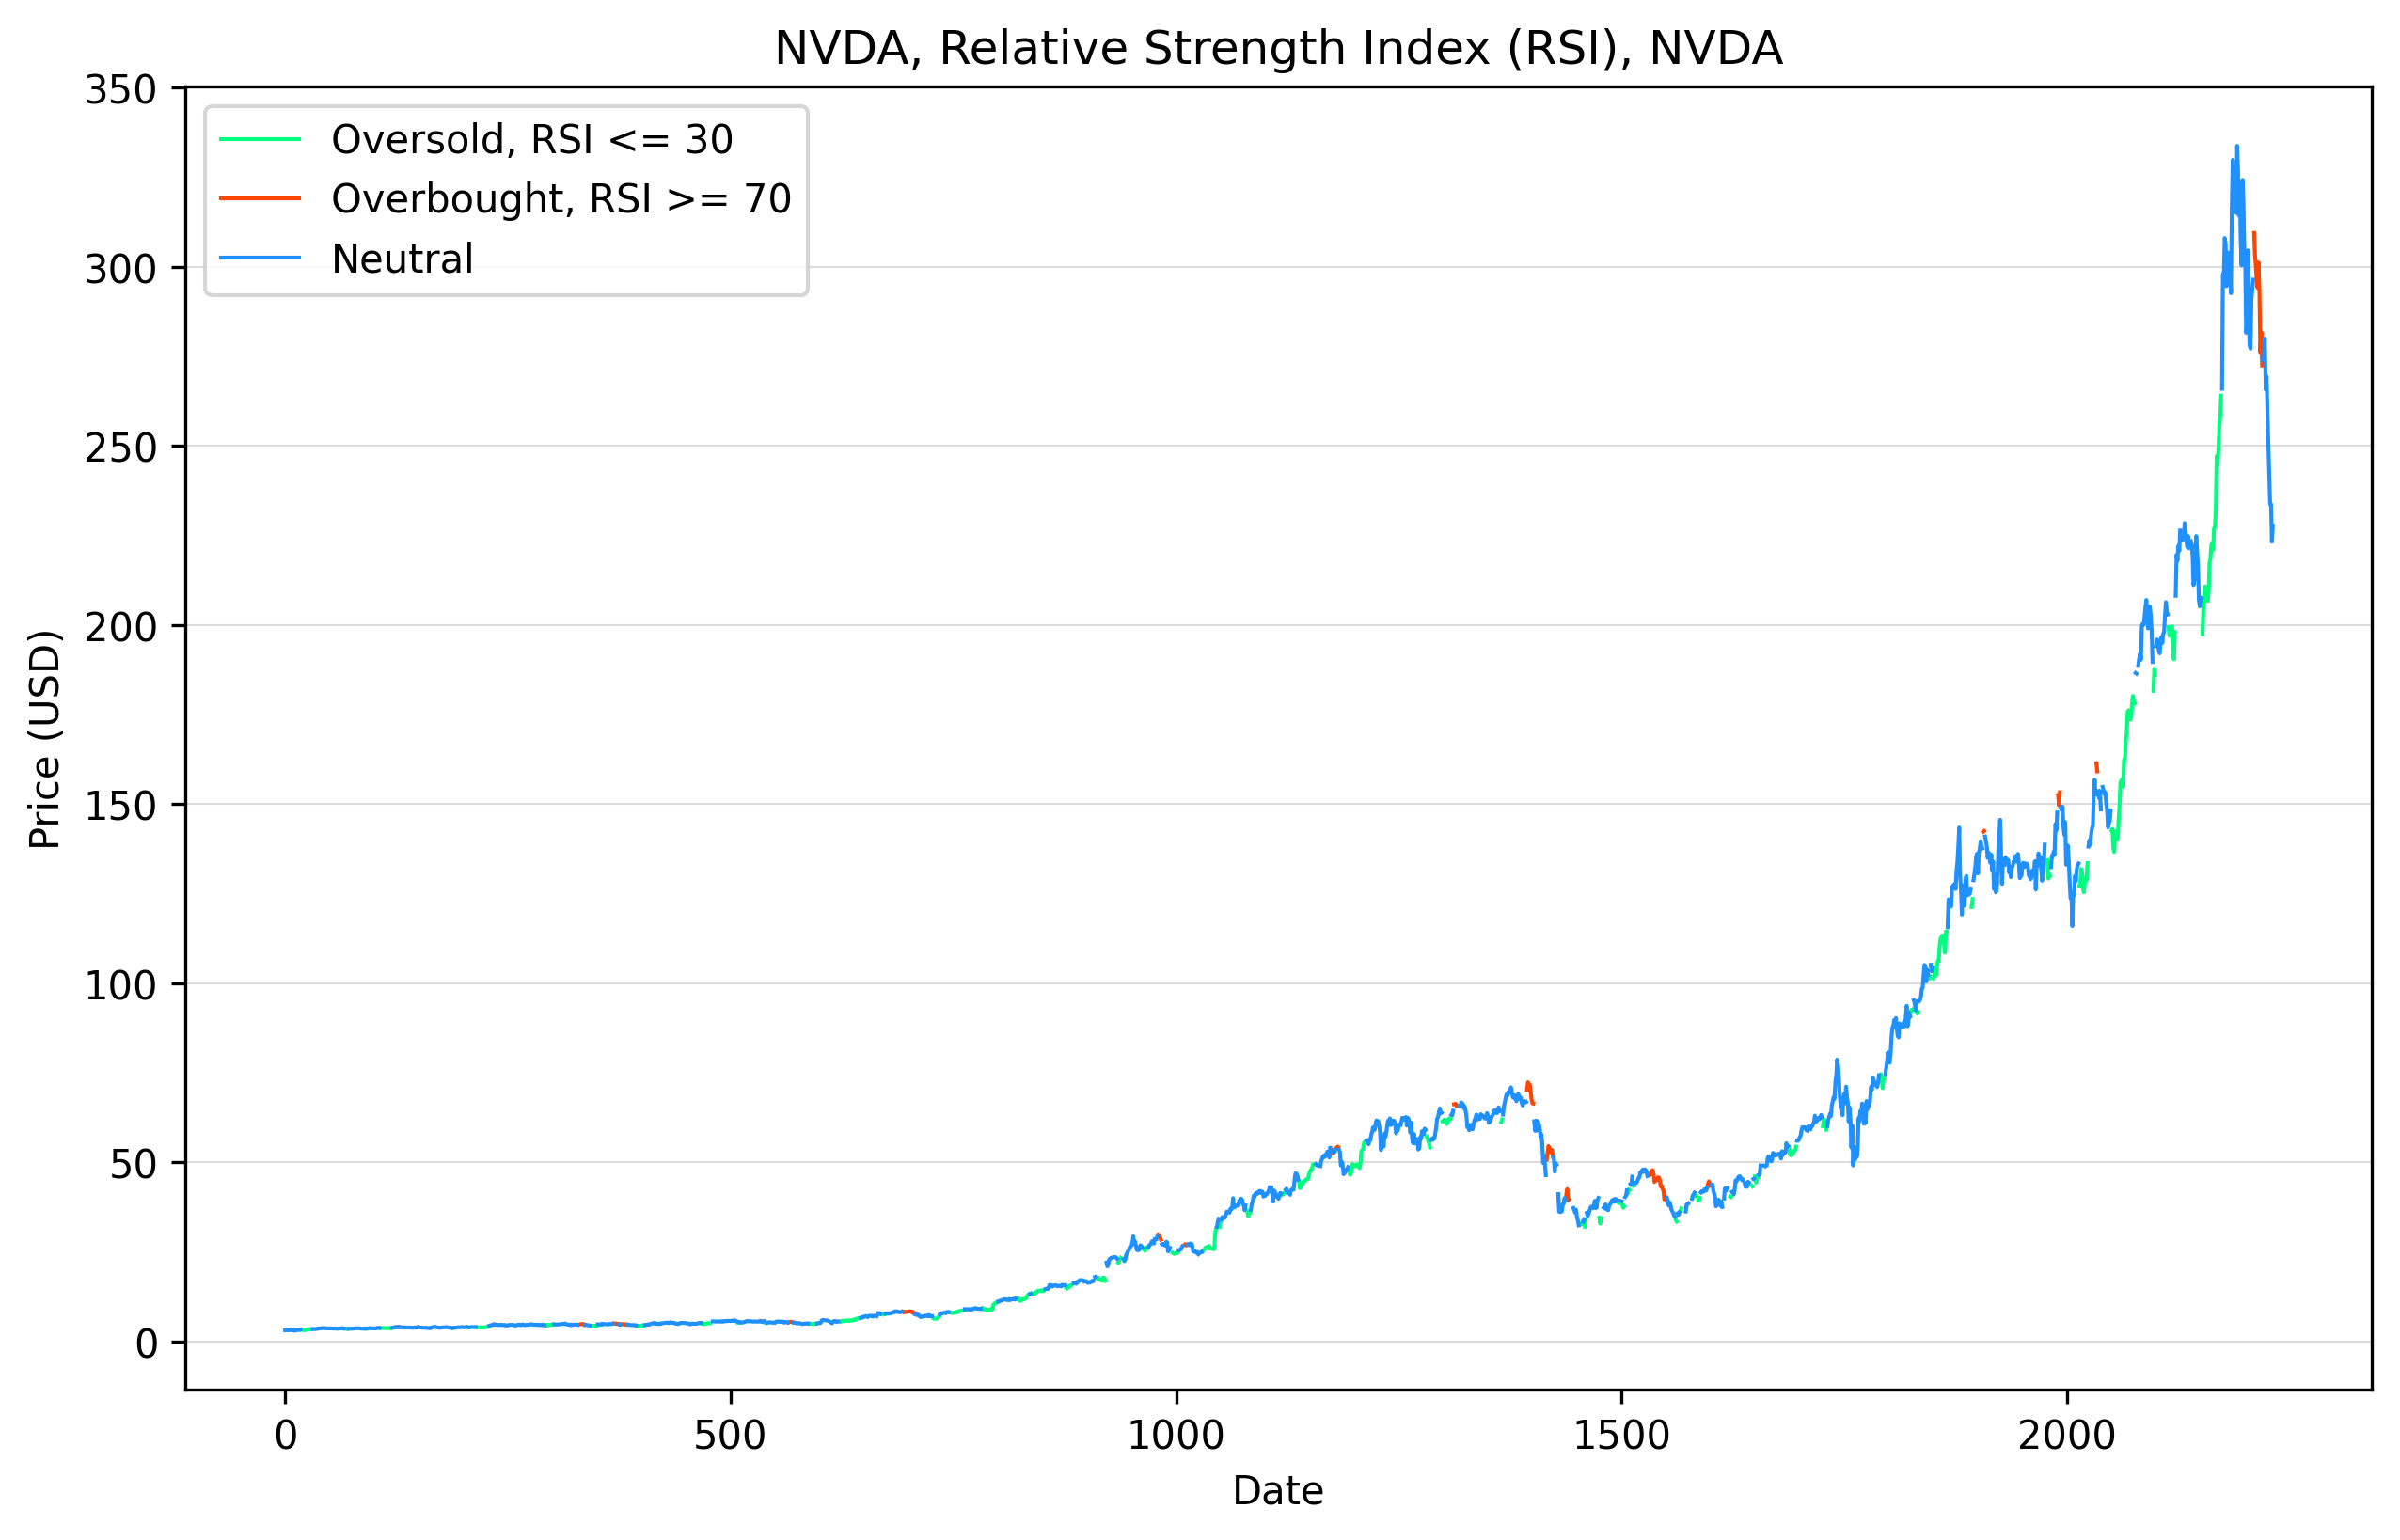

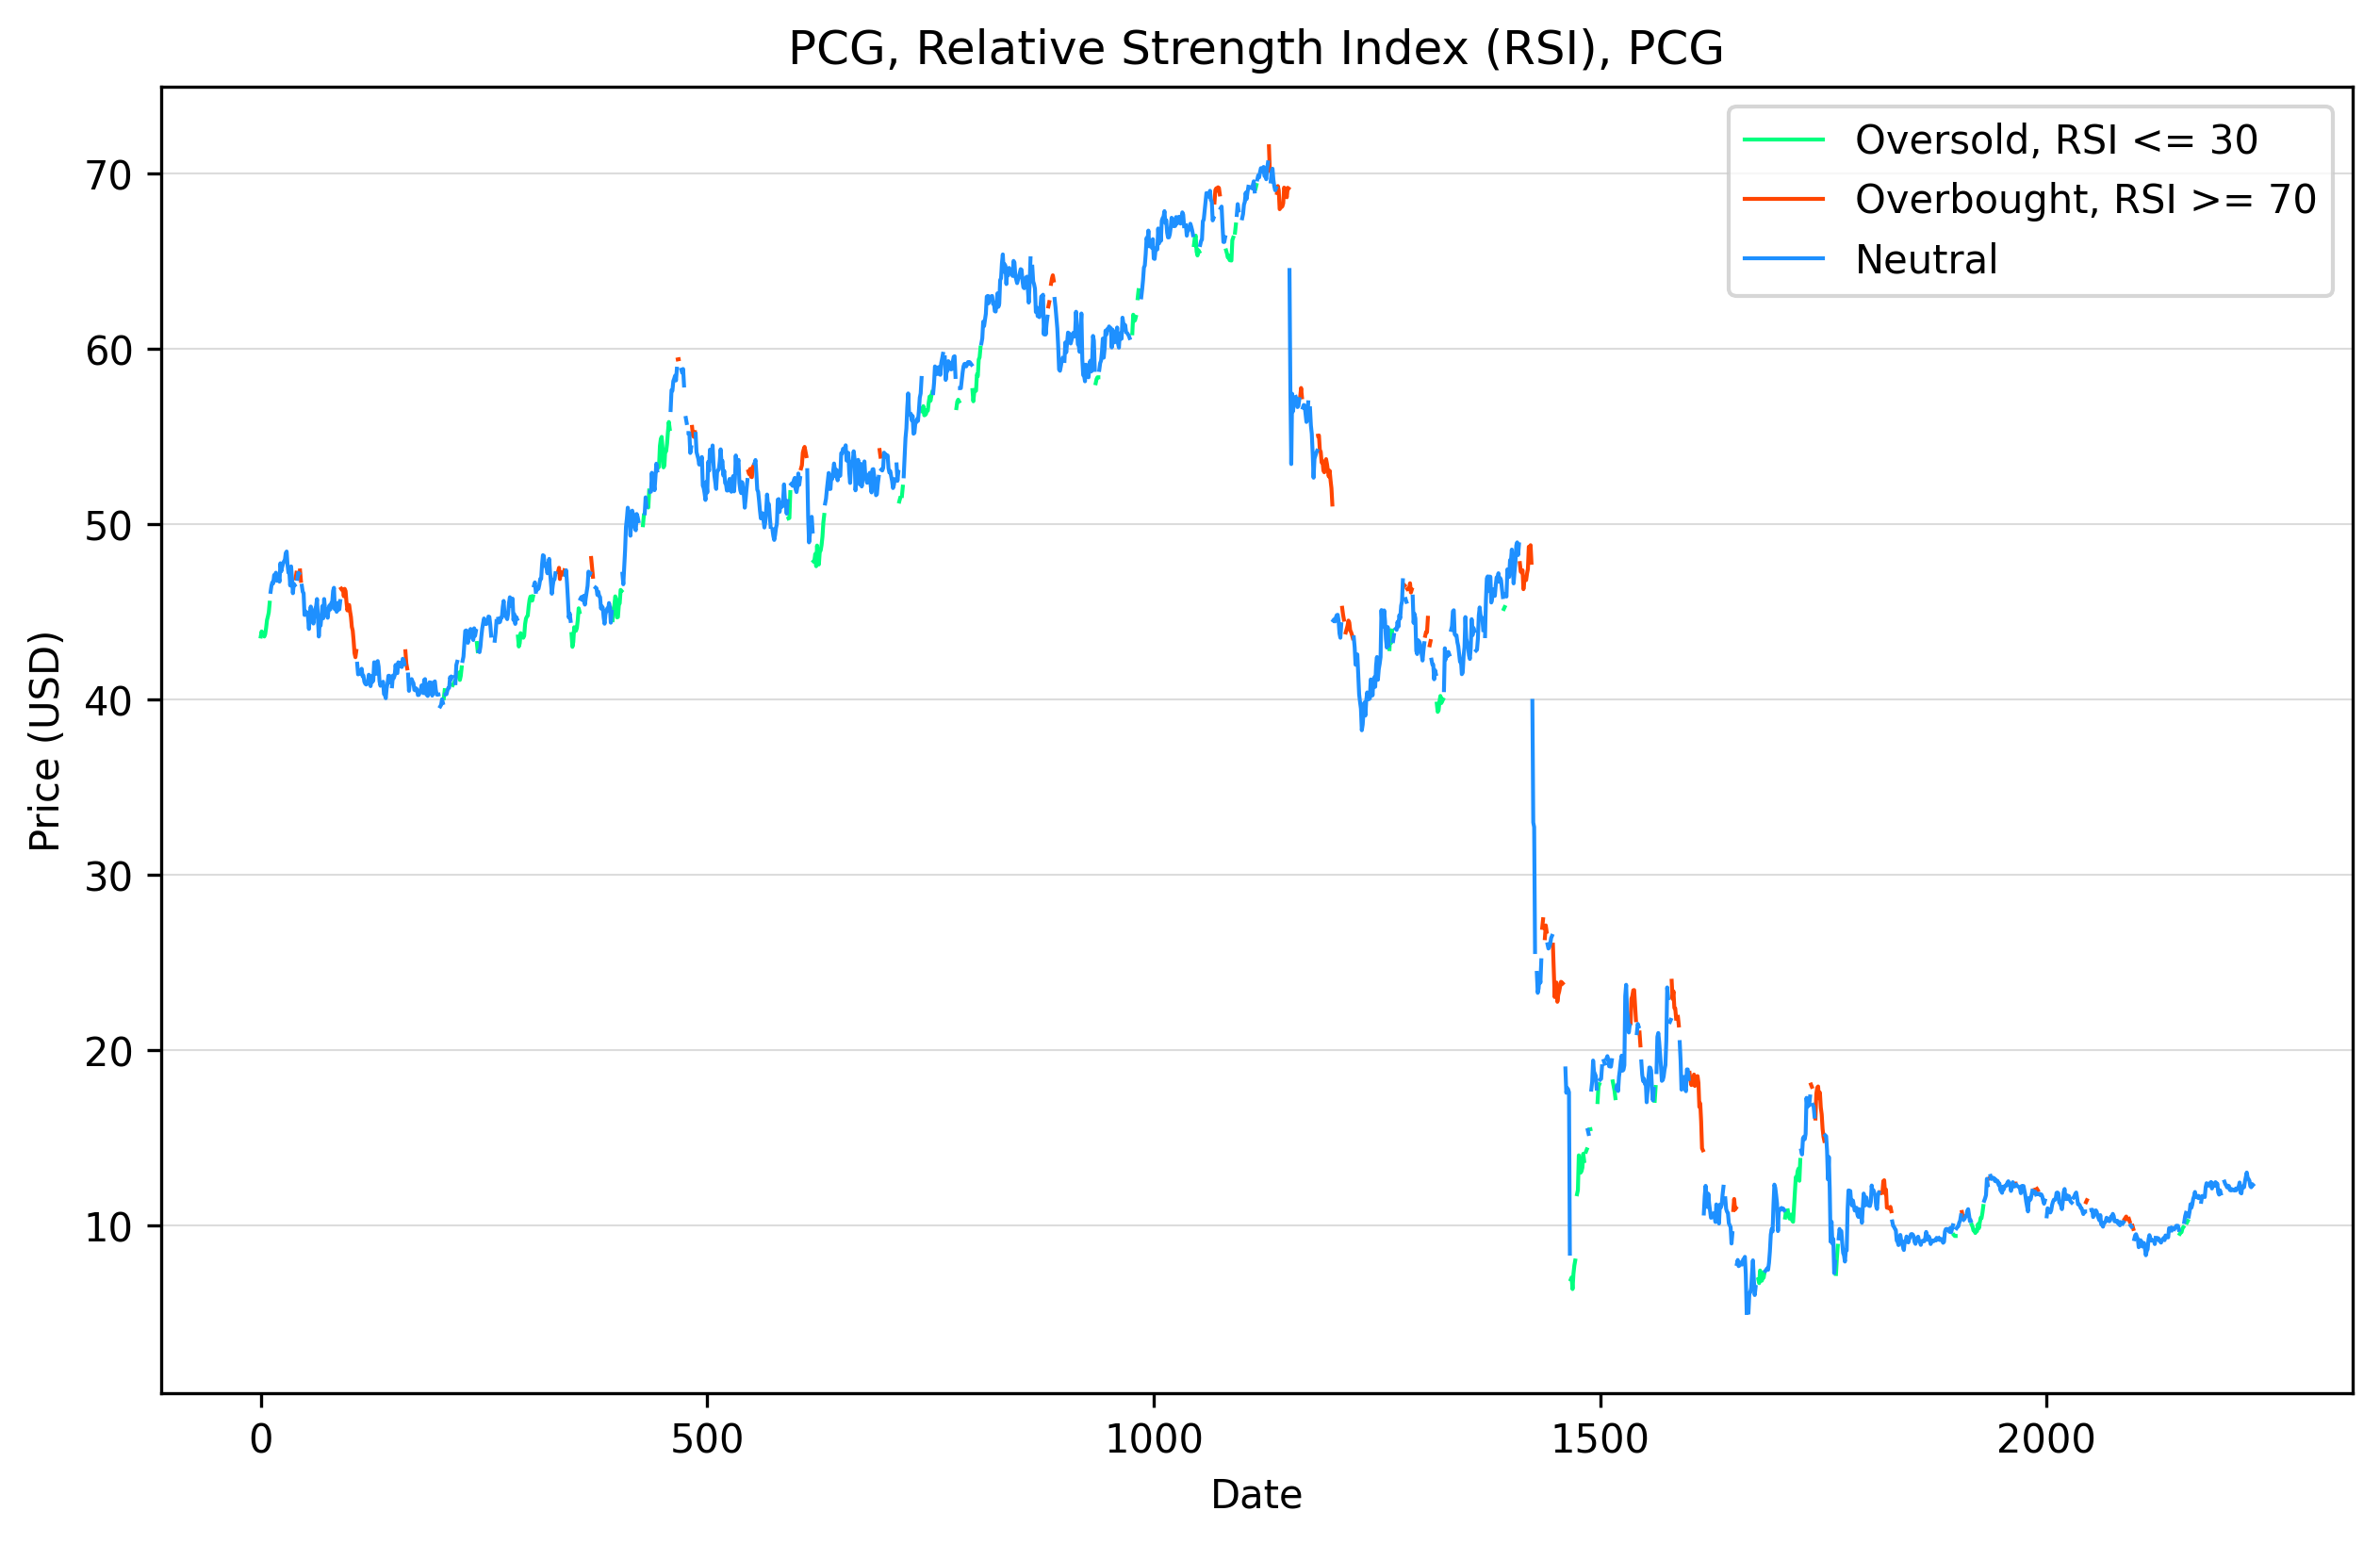

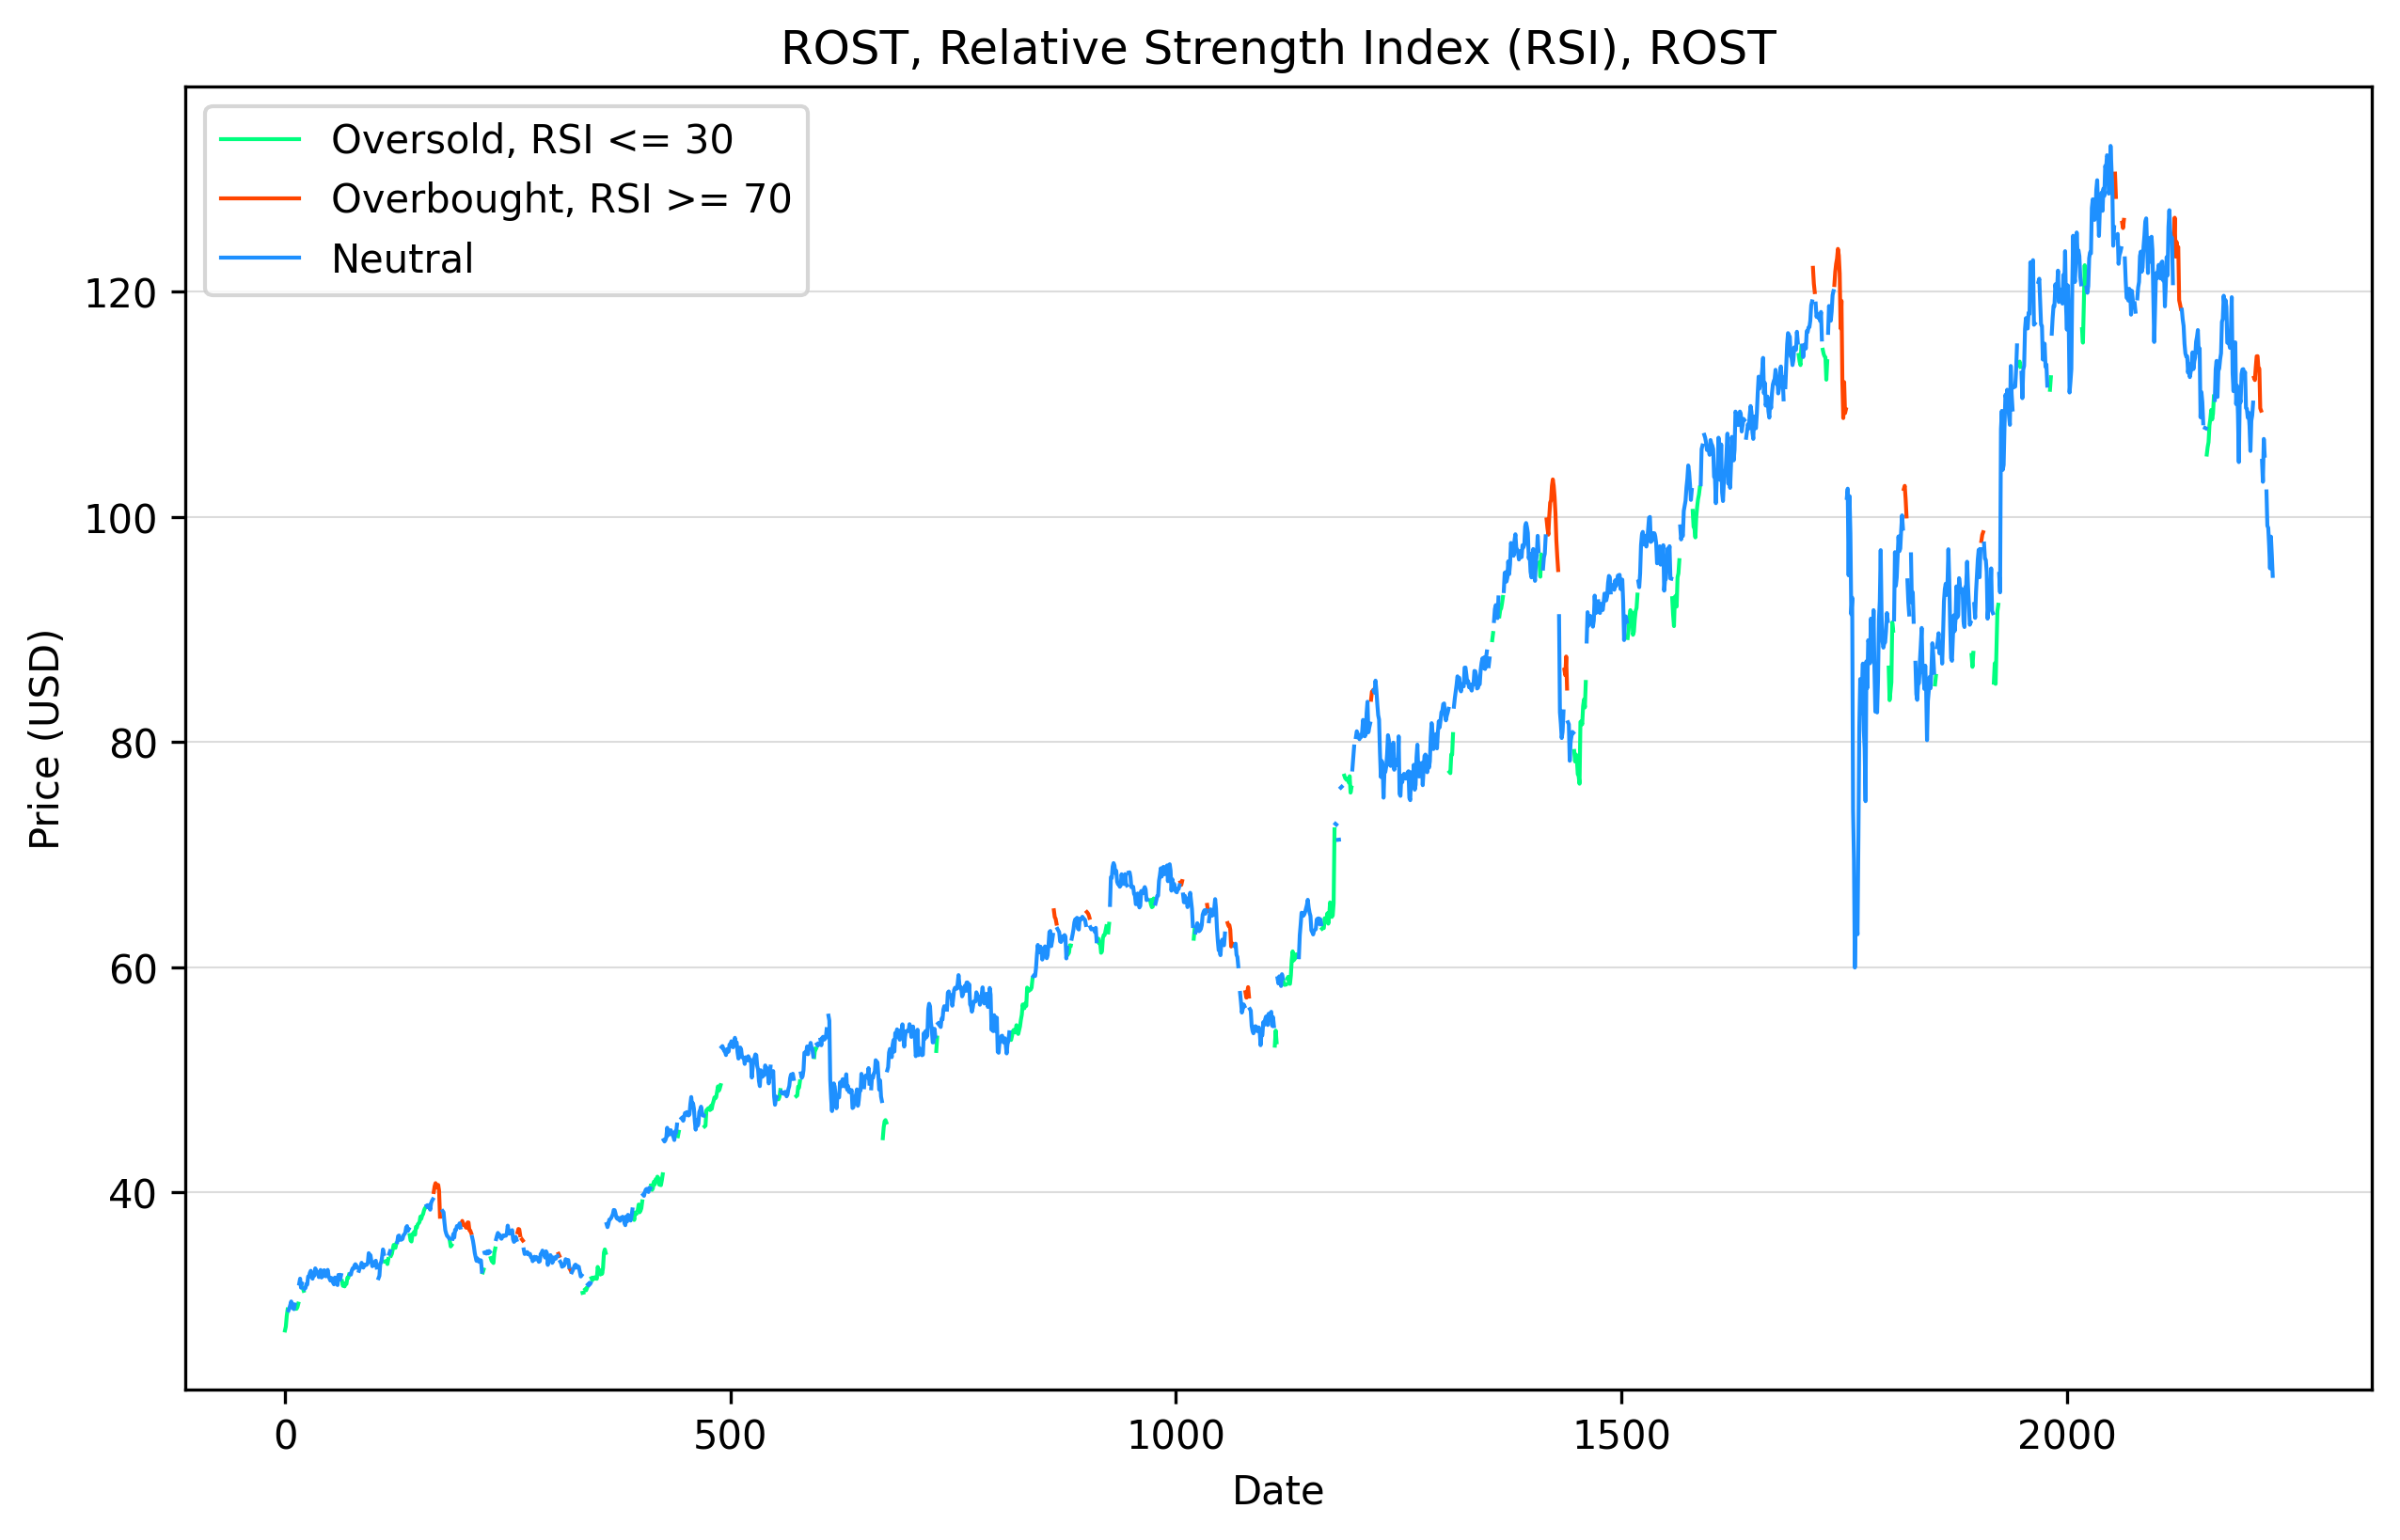

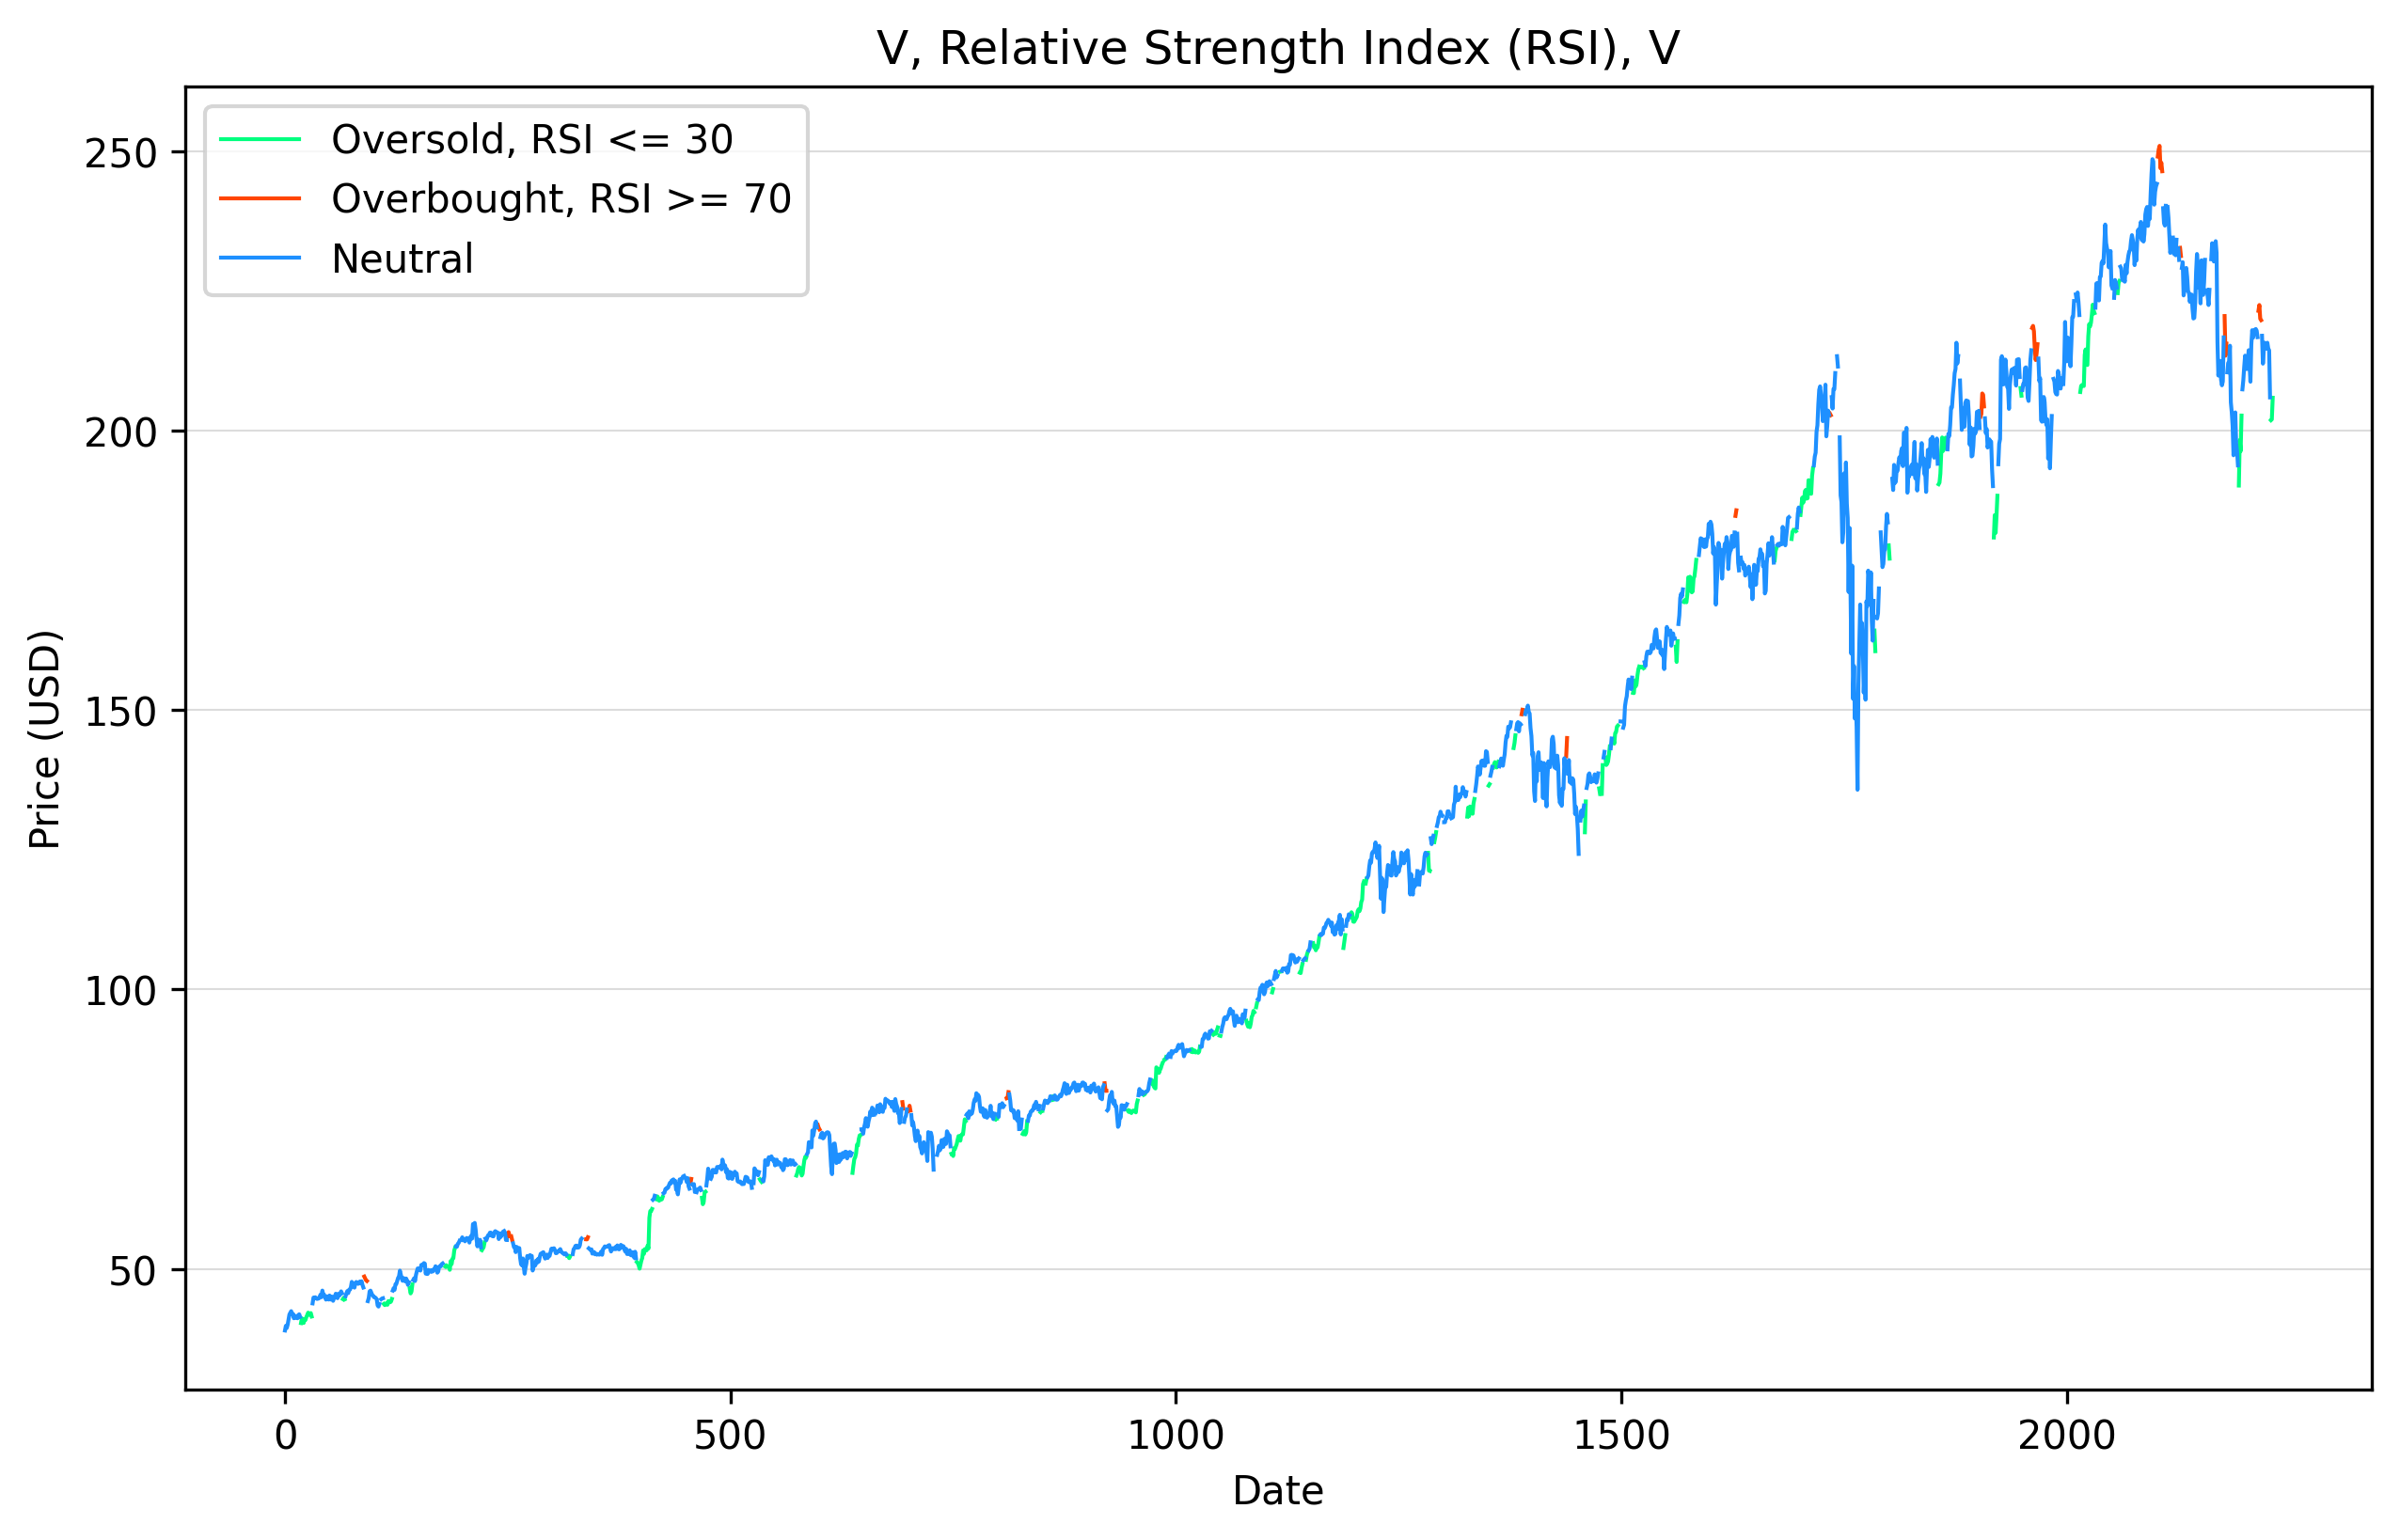

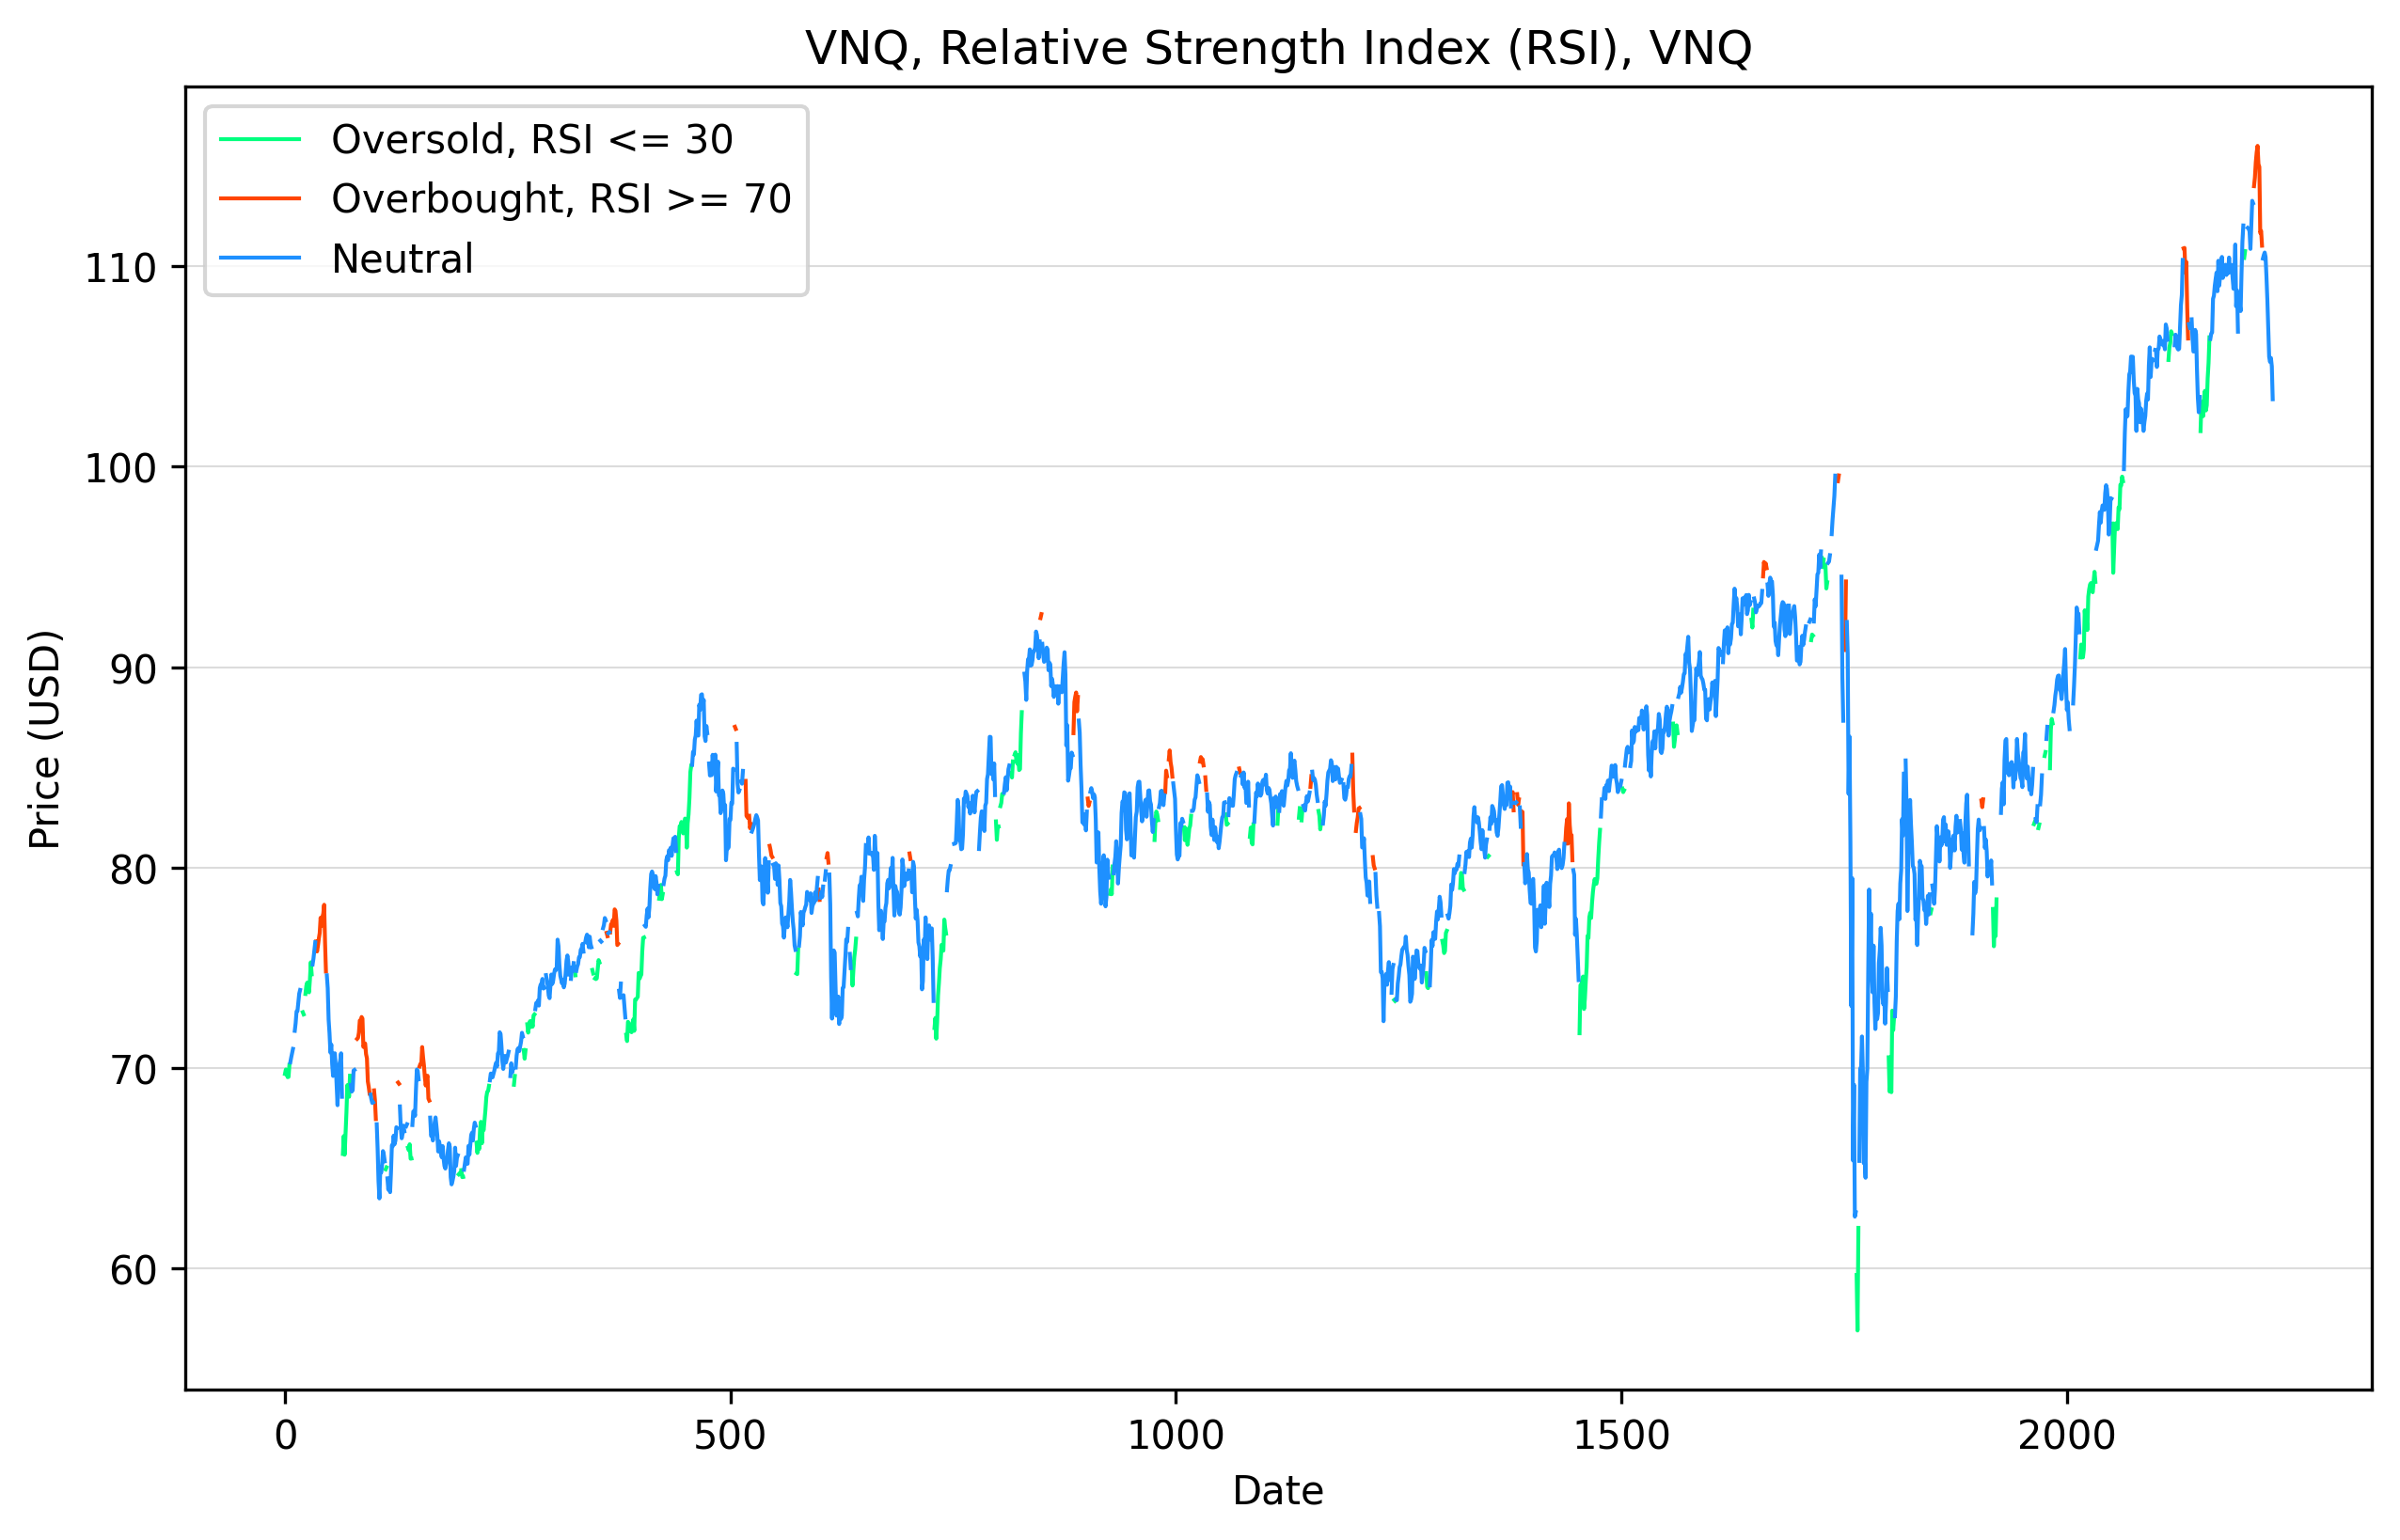

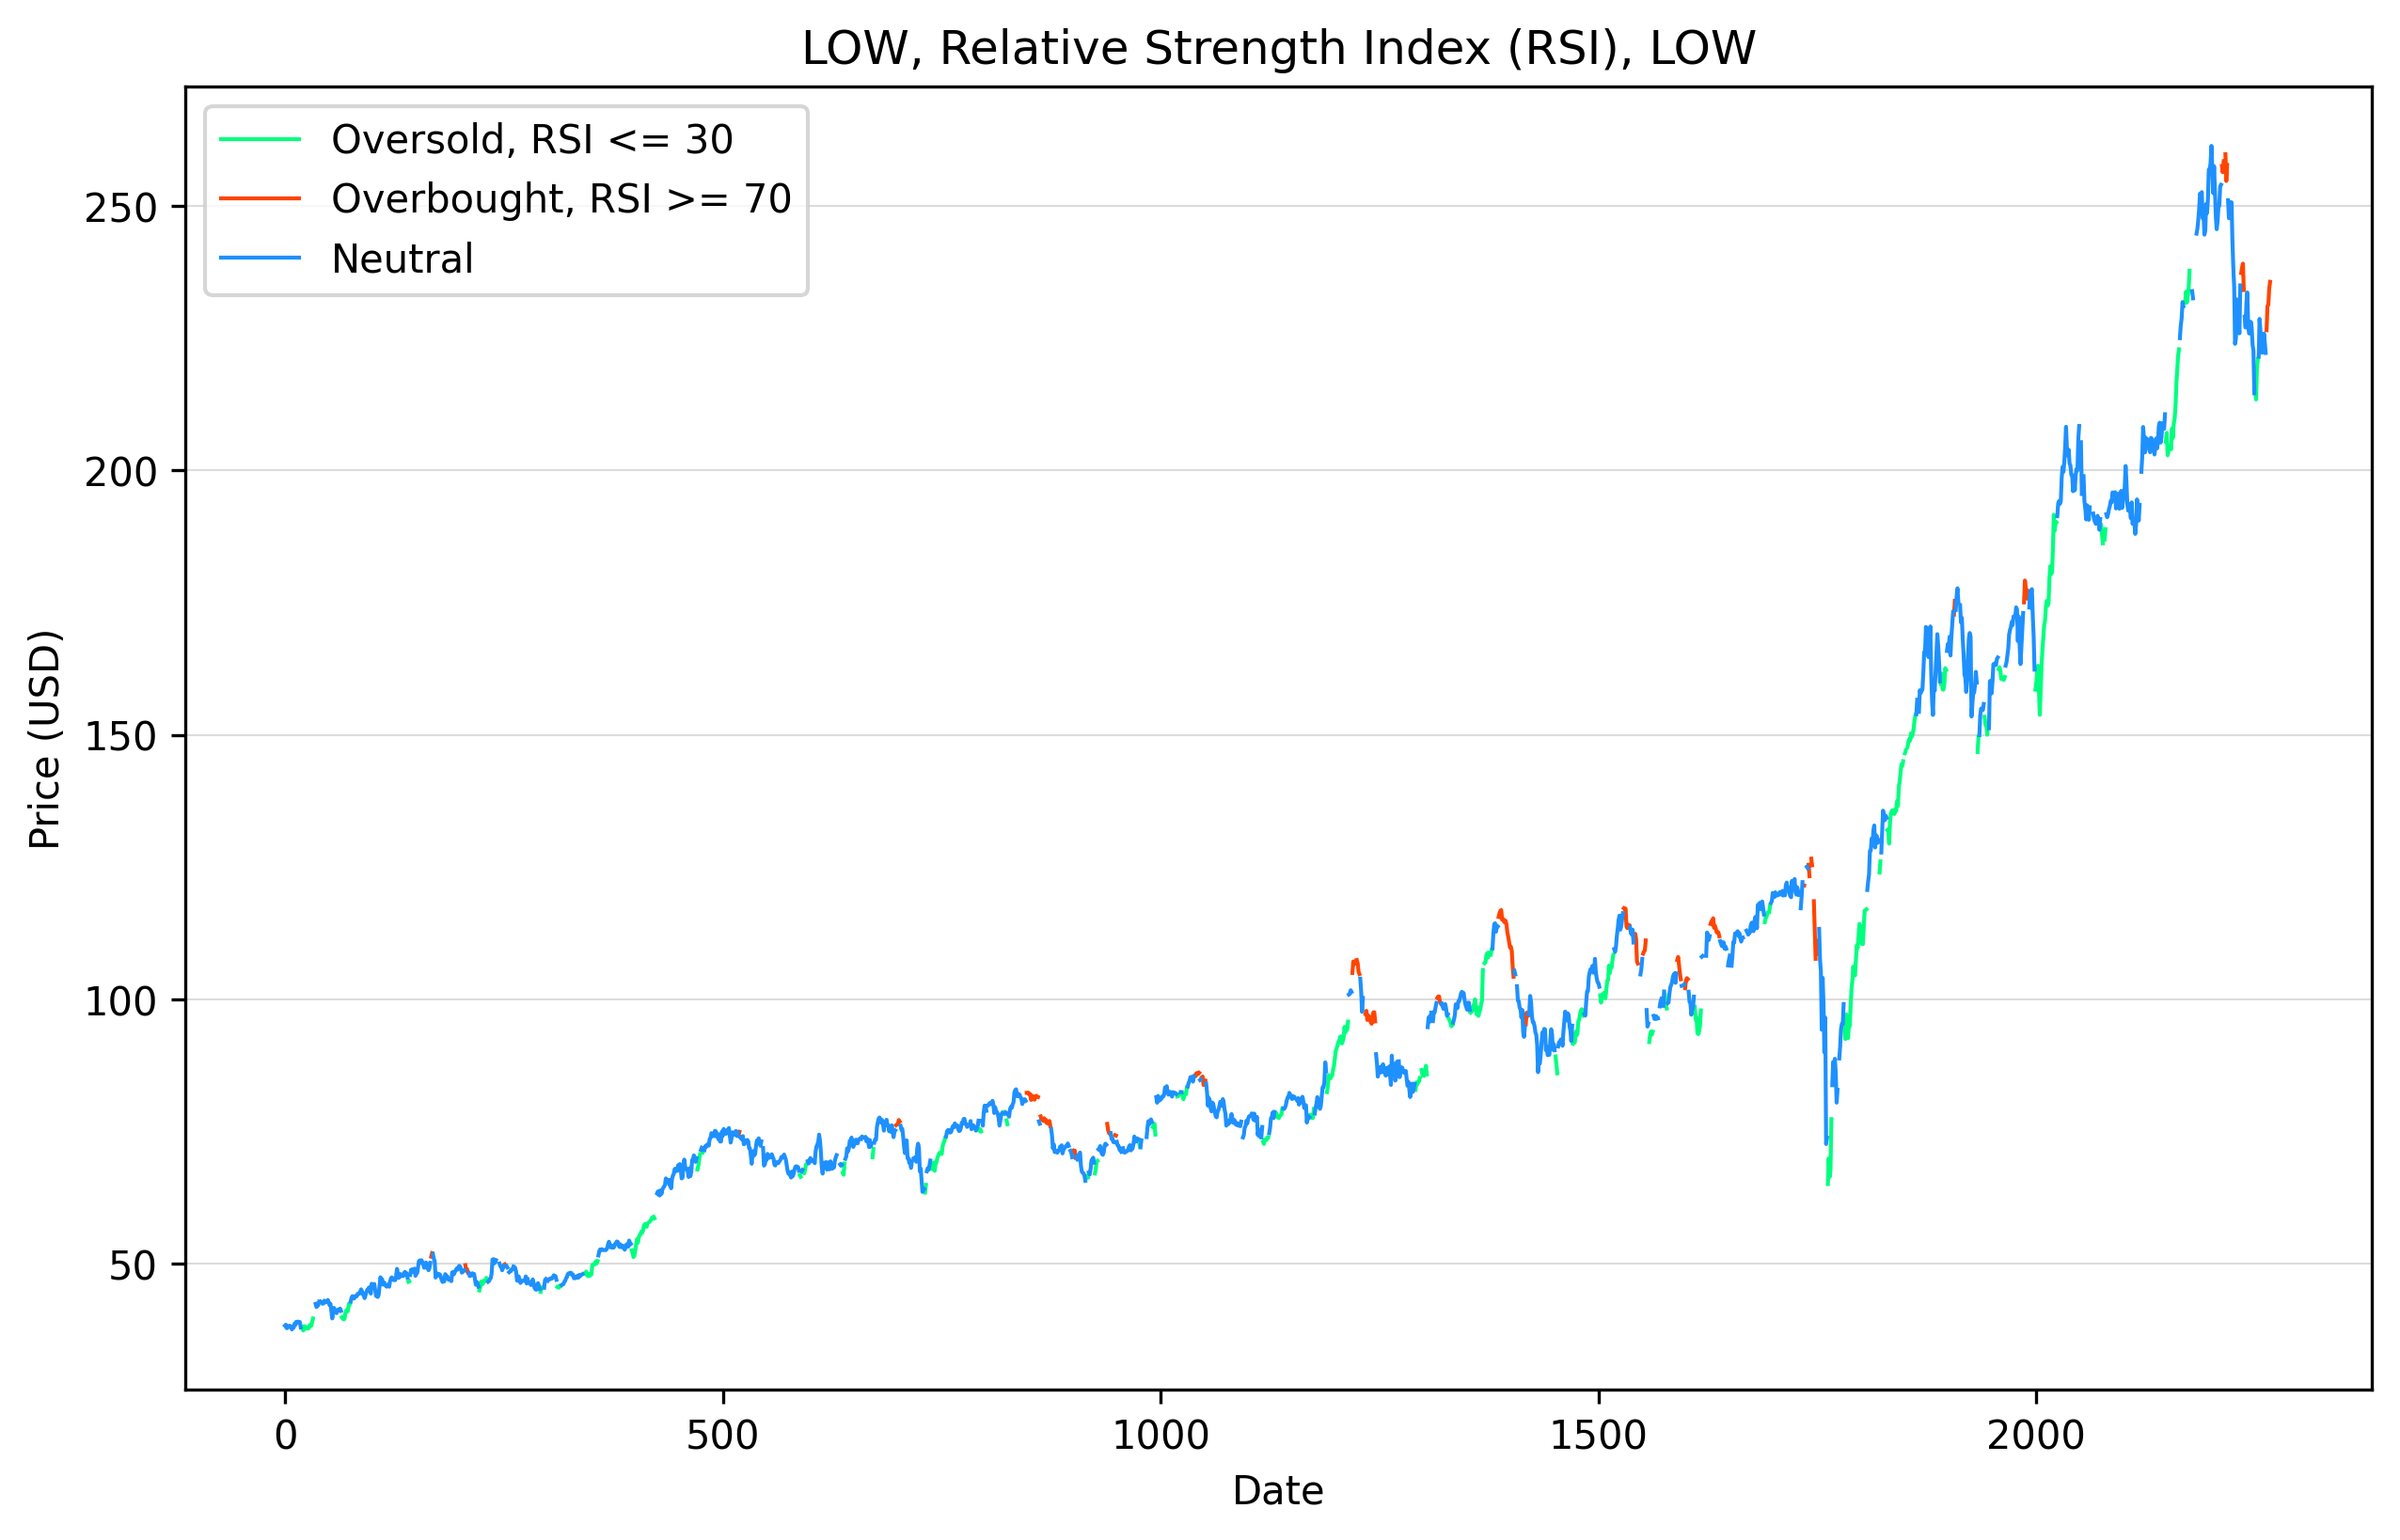

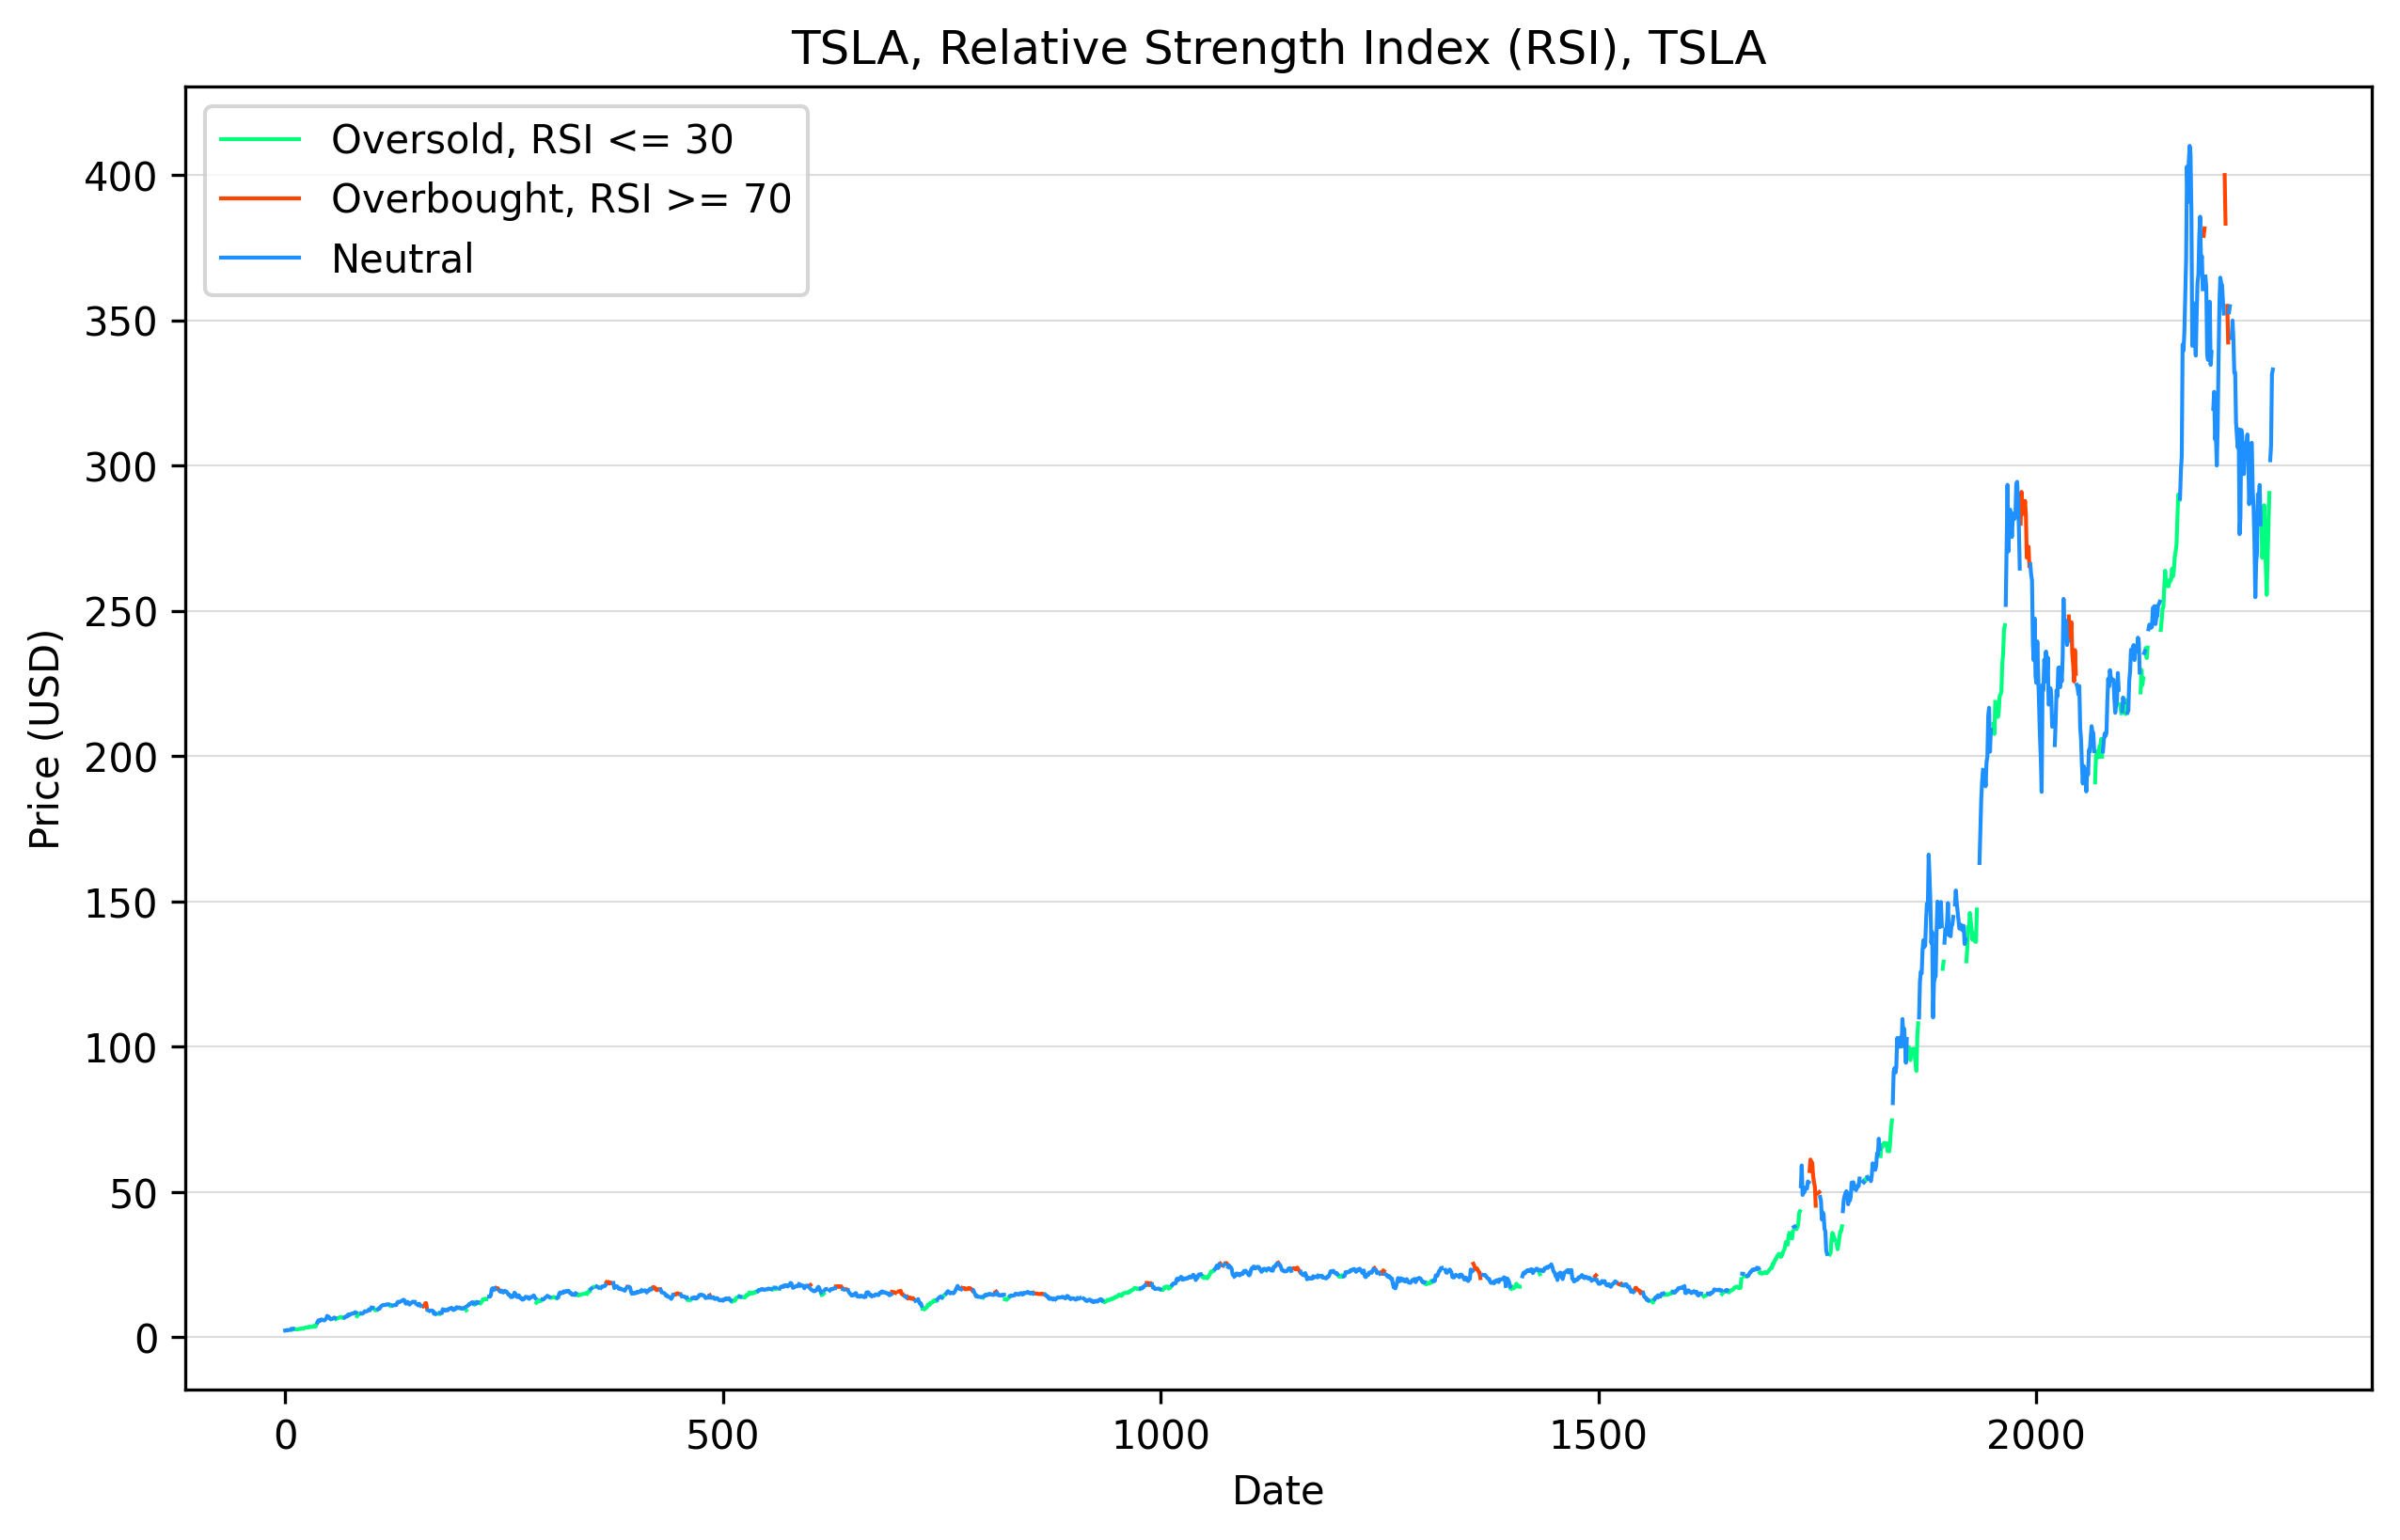

In [24]:
for f in train_data_files:
	df = pd.read_csv(train_data_path + f + "_clean.csv", parse_dates=["Date"], index_col="Date")

	df["5_day"] = df["Close/Last"].rolling(window=5).mean()
	df["10_day"] = df["Close/Last"].rolling(window=10).mean()
	df["20_day"] = df["Close/Last"].rolling(window=20).mean()
	df["market_cap_b"] = (df["Volume"] * df["Open"])/1e9

	df['open-close'] = df['Open'] - df['Close/Last'].shift(1)
	df['open-open'] = df['Open'] - df['Open'].shift(1)

	df["change"] = df["Close/Last"].diff()
	
	df["change_up"] = df["change"].apply(lambda x: 0 if x < 0 else x)
	df["change_down"] = df["change"].apply(lambda x: 0 if x > 0 else x)
	
	assert df["change"].equals(df["change_up"] + df["change_down"])

	df["avg_up"] = df["change_up"].rolling(14).mean()
	df["avg_down"] = df["change_down"].rolling(14).mean().abs()
	
	df.dropna(inplace=True)
	df["rsi"] = (100 * df["avg_up"]) / (df["avg_up"] + df["avg_down"])
	df.drop(["change", "change_up", "change_down", "avg_up", "avg_down"], axis=1, inplace=True)

	df["buy"] = (df["Close/Last"].shift() > df["Close/Last"]).astype(int)
	df.dropna(inplace=True)

	plt.figure(figsize=(10,6), dpi=300)
	plt.plot(np.where(df["rsi"] <= 30, df["Close/Last"], None)[::-1], linewidth=1, color='springgreen', label="Oversold, RSI <= 30")
	plt.plot(np.where(df["rsi"] >= 70, df["Close/Last"], None)[::-1], linewidth=1, color='orangered', label="Overbought, RSI >= 70")
	plt.plot(np.where((df["rsi"] > 30) & (df["rsi"] < 70), df["Close/Last"], None)[::-1], linewidth=1, color='dodgerblue', label="Neutral")
	plt.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
	plt.title(f"{f}, Relative Strength Index (RSI), {f}")
	plt.ylabel("Price (USD)")
	plt.xlabel("Date")
	plt.legend()
	plt.savefig(vis_path + f"{f}_rsi.svg", bbox_inches="tight", format='svg')
	df.to_csv(train_data_path + f"{f}_clean.csv")

for f in test_data_files:
	df = pd.read_csv(test_data_path + f + "_clean.csv", parse_dates=["Date"], index_col="Date")

	df["5_day"] = df["Close/Last"].rolling(window=5).mean()
	df["10_day"] = df["Close/Last"].rolling(window=10).mean()
	df["20_day"] = df["Close/Last"].rolling(window=20).mean()
	df["market_cap_b"] = (df["Volume"] * df["Open"])/1e9

	df['open-close'] = df['Open'] - df['Close/Last'].shift(1)
	df['open-open'] = df['Open'] - df['Open'].shift(1)
	
	df["change"] = df["Close/Last"].diff()
	
	df["change_up"] = df["change"].apply(lambda x: 0 if x < 0 else x)
	df["change_down"] = df["change"].apply(lambda x: 0 if x > 0 else x)
	
	assert df["change"].equals(df["change_up"] + df["change_down"])

	df["avg_up"] = df["change_up"].rolling(14).mean()
	df["avg_down"] = df["change_down"].rolling(14).mean().abs()
	
	df.dropna(inplace=True)
	df["rsi"] = (100 * df["avg_up"]) / (df["avg_up"] + df["avg_down"])
	df.drop(["change", "change_up", "change_down", "avg_up", "avg_down"], axis=1, inplace=True)

	df["buy"] = (df["Close/Last"].shift() > df["Close/Last"]).astype(int)
	df.dropna(inplace=True)

	plt.figure(figsize=(10,6), dpi=300)
	plt.plot(np.where(df["rsi"] <= 30, df["Close/Last"], None)[::-1], linewidth=1, color='springgreen', label="Oversold, RSI <= 30")
	plt.plot(np.where(df["rsi"] >= 70, df["Close/Last"], None)[::-1], linewidth=1, color='orangered', label="Overbought, RSI >= 70")
	plt.plot(np.where((df["rsi"] > 30) & (df["rsi"] < 70), df["Close/Last"], None)[::-1], linewidth=1, color='dodgerblue', label="Neutral")
	plt.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
	plt.title(f"{f}, Relative Strength Index (RSI), {f}")
	plt.ylabel("Price (USD)")
	plt.xlabel("Date")
	plt.legend()
	plt.savefig(vis_path + f"{f}_rsi.svg", bbox_inches="tight", format='svg')
	
	df.to_csv(test_data_path + f"{f}_clean.csv")